In [80]:
import time
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import urllib
import requests as req
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

In [81]:
data_url = 'https://raw.githubusercontent.com/Praja04/Sofia-Final-Project/main/ML/grocery_sales.csv'
urllib.request.urlretrieve(data_url, 'grocery_sales.csv')
df = pd.read_csv('grocery_sales.csv')

In [82]:
df.head()

Item  Order Date      Sales       Profit
0              Salt  11/08/2017  235601.52   75392.4864
1     Health_Drinks  11/08/2017  140722.12   28144.4240
2             Flour  06/12/2017  443396.80   31037.7760
3  Fresh_Vegetables  10/11/2016  168340.48   16834.0480
4   Organic_Staples  10/11/2016  442457.40  172558.3860

In [83]:
new_df = pd.DataFrame(df)

In [ ]:
#def df_user(id):
  #df_user = new_df[new_df['user_id']==id]
  #return df_user

In [ ]:
#def get_userid(username):
    #user_data = api.get_user(screen_name=username)
    #user_id = user_data.id_str
    #return user_id

In [ ]:
#user =  get_userid()

In [ ]:
#new_df = df_user(user)

In [84]:
# Selecting specific columns
#selected_columns = ['createdAt', 'nama_barang', 'total_harga']
selected_columns = ['Order Date', 'Item', 'Sales']
df_selected = new_df[selected_columns]

<ipython-input-51-f8b914e88c98>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


In [85]:
# Remove rows with NaN values in the 'Sales' column
df_selected = df_selected.dropna(subset=['Sales'])

In [86]:
# Normalizing numerical columns using Min-Max scaling
numerical_columns = ['Sales']
scaler = MinMaxScaler()
df_selected[numerical_columns] = scaler.fit_transform(df_selected[numerical_columns])

In [87]:
# Sort the DataFrame by 'Order Date'
df_selected.sort_values('Order Date', inplace=True)
df_selected.head

<bound method NDFrame.head of       Order Date         Item   Sales
3472  01/01/2018       Breads  0.8185
8706  01/01/2018      Cookies  0.7725
848   01/01/2018         Salt  0.4265
1889  01/01/2018  Soft_Drinks  0.9205
1492  01/01/2018   Edible_Oil  0.5060
...          ...          ...     ...
6410   9/30/2018        Flour  0.0410
6348   9/30/2018         Rice  0.0965
2750   9/30/2018      Noodles  0.0745
6424   9/30/2018         Meat  0.7340
9211   9/30/2018  Soft_Drinks  0.6900

[9994 rows x 3 columns]>

In [ ]:
#distinc the items
items = df_selected['Item'].drop_duplicates(keep = 'first')
print(items)

3472                Breads
8706               Cookies
848                   Salt
1889           Soft_Drinks
1492            Edible_Oil
3390      Fresh_Vegetables
3561                 Flour
3422               Chicken
6654               Legumes
215                Noodles
216                   Rice
214          Health_Drinks
2654                  Meat
6409            Chocolates
6988              Biscuits
6905                 Cakes
8101                Spices
8121       Organic_Staples
3872                  Fish
9395    Organic_Vegetables
9493        Organic_Fruits
716           Fresh_Fruits
8983                  Eggs
Name: Item, dtype: object


In [ ]:
# Create a dictionary to store DataFrames for each item
dfs = {}
#make a new df for every items
for item in items:
    item_df = pd.DataFrame(df_selected.loc[df_selected['Item'] == item]).copy
    dfs[item] = item_df
#print every item's df
for item, item_df in dfs.items():
    print(f"DataFrame for {item}:")
    print(item_df)
    print("\n")

DataFrame for Breads:
<bound method NDFrame.copy of       Order Date    Item   Sales
3472  01/01/2018  Breads  0.8185
3323  01/03/2015  Breads  0.1820
9594  01/05/2016  Breads  0.1880
8303  01/09/2017  Breads  0.3370
4487  02/02/2018  Breads  0.2595
...          ...     ...     ...
5445   9/27/2016  Breads  0.0470
8331   9/28/2016  Breads  0.4245
8816   9/28/2018  Breads  0.4975
8831   9/28/2018  Breads  0.0450
1268   9/29/2015  Breads  0.1140

[502 rows x 3 columns]>


DataFrame for Cookies:
<bound method NDFrame.copy of       Order Date     Item   Sales
8706  01/01/2018  Cookies  0.7725
3543  01/01/2018  Cookies  0.4350
8265  01/04/2017  Cookies  0.6570
7296  01/05/2016  Cookies  0.5265
9665  01/05/2016  Cookies  0.1030
...          ...      ...     ...
4473   9/29/2015  Cookies  0.5990
4053   9/29/2017  Cookies  0.6490
2964   9/29/2017  Cookies  0.4320
4122   9/29/2017  Cookies  0.8365
7305   9/29/2018  Cookies  0.4680

[520 rows x 3 columns]>


DataFrame for Salt:
<bound method NDF

In [ ]:
# Create time sequences
def create_sequences(data, sequence_length):
    sequences, targets = [], []
    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i + sequence_length][['Sales']].values
        target = data.iloc[i + sequence_length]['Sales']
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

In [239]:
def build_model(sequence_length):
    model = Sequential()
    model.add(LSTM(50, input_shape=(sequence_length, 1)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(sequence_length*6, activation='relu'))
    model.add(Dense(sequence_length*2, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [240]:
def run_model(name,df, batch_size, sequence_length):
  # Set sequence length and create sequences
  X, y = create_sequences(df, sequence_length)
  X = np.expand_dims(X, axis=-1)
  print(X.size, X.shape)
  # Split the data into train, validation, and test sets
  X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
  X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
  model = build_model(sequence_length)

  early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

  # Train the model
  history = model.fit(X_train, y_train, epochs=50, batch_size=batch_size, validation_data=(X_val, y_val),
                      callbacks=early_stopping
                      )
  plt.figure(figsize=(12, 6))
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Model Training History')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  y_pred = model.predict(X_test)
  print (y_pred.size, y.shape)

  # Plot the actual vs. predicted values
  plt.figure(figsize=(18, 6))
  plt.plot(y_test, label='Actual')
  plt.plot(y_pred, label='Predicted')
  plt.title(f'{name} Actual vs. Predicted Sales {sequence_length}')
  plt.xlabel('Sample Index')
  plt.ylabel('Sales')
  plt.legend()
  plt.show()

  return model

In [ ]:
#for sequence_length in [5,10,15, 20,25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]:
 # run_model('Overall', df_selected, 128, sequence_length)
#for name in [#'Breads',
            # 'Cakes',
             #'Health_Drink','Chocolates', 'Fish', 'Salt', 'Noodles', 'Cookies', 'Organic_Vegetables',
            #'Flour', 'Edible_Oil', 'Chicken', 'Biscuits', 'Legumes', 'Spices', 'Fresh_Fruits', 'Rice',
            # 'Meat'
#]:
  #for sequence_length in [5,10,15, 20,25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]:
    #run_model(name,dfs[name](),32,sequence_length)


199480 (9974, 20, 1, 1)
Epoch 1/50
55/55 [==============================] - 3s 22ms/step - loss: 0.1053 - val_loss: 0.0836
Epoch 2/50
55/55 [==============================] - 1s 14ms/step - loss: 0.0864 - val_loss: 0.0825
Epoch 3/50
55/55 [==============================] - 1s 14ms/step - loss: 0.0856 - val_loss: 0.0827
Epoch 4/50
55/55 [==============================] - 1s 13ms/step - loss: 0.0851 - val_loss: 0.0826
Epoch 5/50
55/55 [==============================] - 1s 14ms/step - loss: 0.0848 - val_loss: 0.0825
Epoch 6/50
55/55 [==============================] - 1s 14ms/step - loss: 0.0848 - val_loss: 0.0823
Epoch 7/50
55/55 [==============================] - 1s 13ms/step - loss: 0.0850 - val_loss: 0.0821
Epoch 8/50
55/55 [==============================] - 1s 13ms/step - loss: 0.0853 - val_loss: 0.0825
Epoch 9/50
55/55 [==============================] - 1s 15ms/step - loss: 0.0852 - val_loss: 0.0822
Epoch 10/50
55/55 [==============================] - 1s 20ms/step - loss: 0.0849 - va

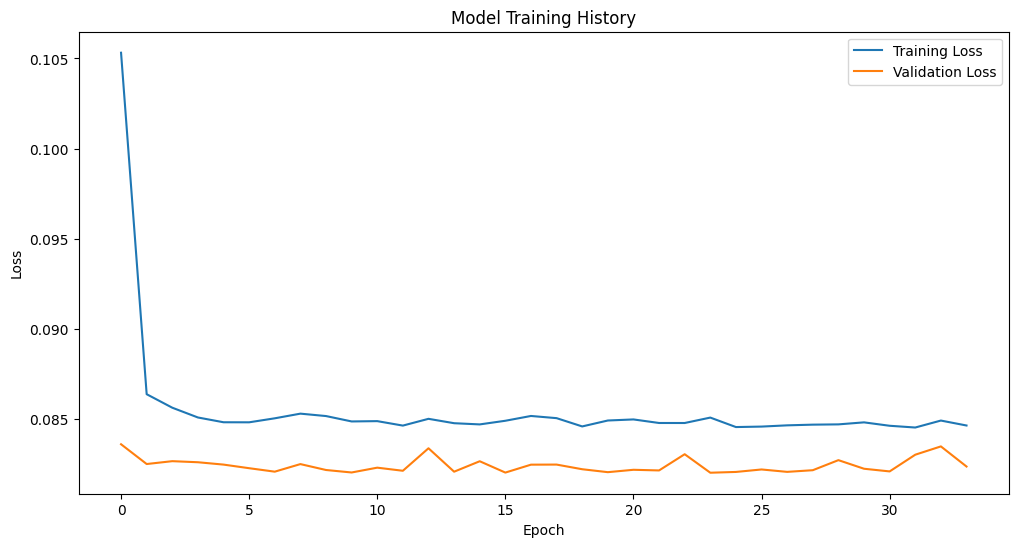

47/47 [==============================] - 1s 3ms/step
1497 (9974,)


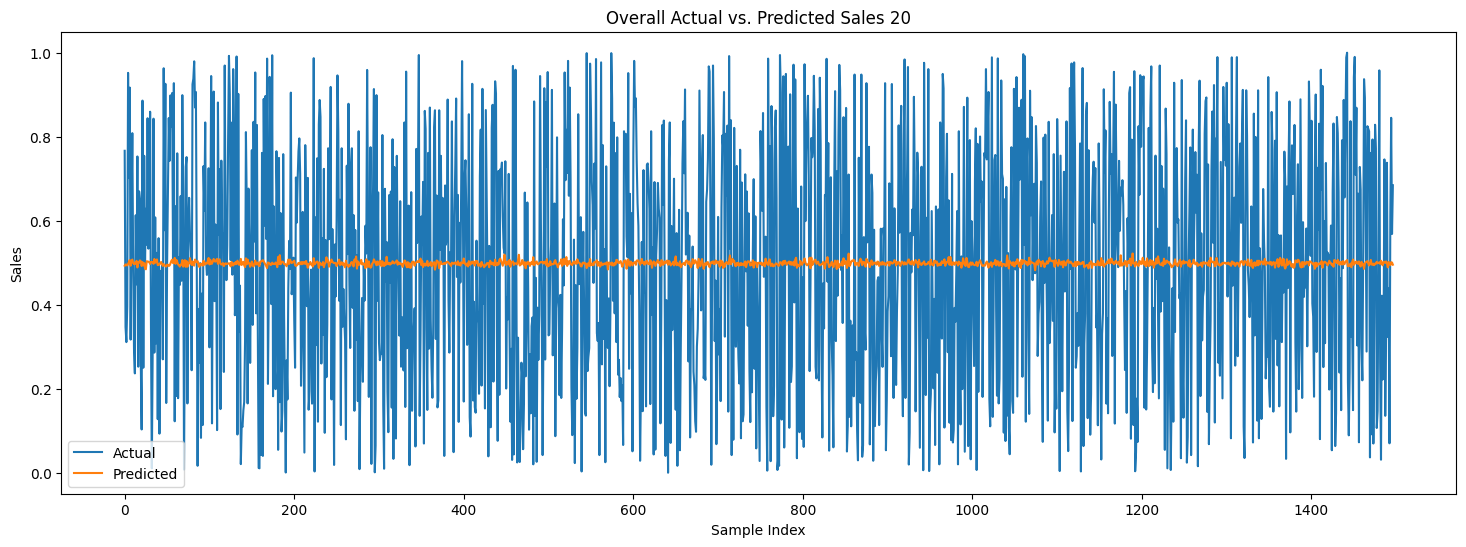

11925 (477, 25, 1, 1)
Epoch 1/50
11/11 [==============================] - 3s 84ms/step - loss: 0.1937 - val_loss: 0.0899
Epoch 2/50
11/11 [==============================] - 0s 15ms/step - loss: 0.0920 - val_loss: 0.0909
Epoch 3/50
11/11 [==============================] - 0s 11ms/step - loss: 0.0908 - val_loss: 0.0822
Epoch 4/50
11/11 [==============================] - 0s 14ms/step - loss: 0.0859 - val_loss: 0.0829
Epoch 5/50
11/11 [==============================] - 0s 10ms/step - loss: 0.0860 - val_loss: 0.0817
Epoch 6/50
11/11 [==============================] - 0s 12ms/step - loss: 0.0850 - val_loss: 0.0813
Epoch 7/50
11/11 [==============================] - 0s 13ms/step - loss: 0.0847 - val_loss: 0.0806
Epoch 8/50
11/11 [==============================] - 0s 13ms/step - loss: 0.0861 - val_loss: 0.0804
Epoch 9/50
11/11 [==============================] - 0s 12ms/step - loss: 0.0874 - val_loss: 0.0828
Epoch 10/50
11/11 [==============================] - 0s 12ms/step - loss: 0.0848 - val_

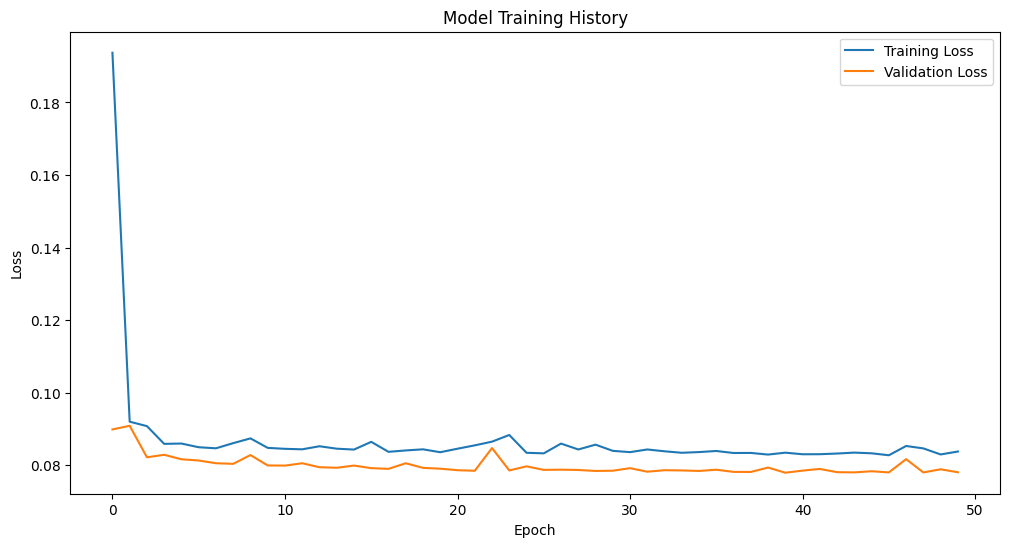

3/3 [==============================] - 0s 4ms/step
72 (477,)


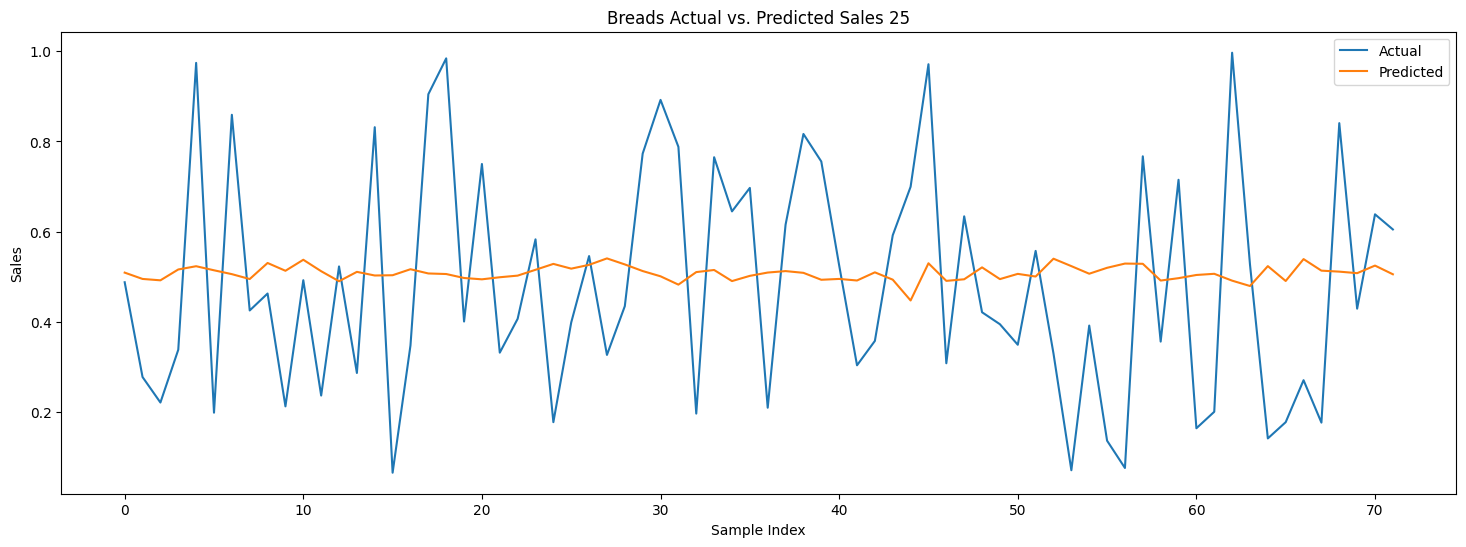

6555 (437, 15, 1, 1)
Epoch 1/50
10/10 [==============================] - 3s 49ms/step - loss: 0.2326 - val_loss: 0.0954
Epoch 2/50
10/10 [==============================] - 0s 9ms/step - loss: 0.0925 - val_loss: 0.0953
Epoch 3/50
10/10 [==============================] - 0s 11ms/step - loss: 0.0888 - val_loss: 0.0852
Epoch 4/50
10/10 [==============================] - 0s 9ms/step - loss: 0.0882 - val_loss: 0.0886
Epoch 5/50
10/10 [==============================] - 0s 12ms/step - loss: 0.0874 - val_loss: 0.0838
Epoch 6/50
10/10 [==============================] - 0s 11ms/step - loss: 0.0871 - val_loss: 0.0856
Epoch 7/50
10/10 [==============================] - 0s 10ms/step - loss: 0.0867 - val_loss: 0.0837
Epoch 8/50
10/10 [==============================] - 0s 11ms/step - loss: 0.0862 - val_loss: 0.0834
Epoch 9/50
10/10 [==============================] - 0s 11ms/step - loss: 0.0856 - val_loss: 0.0825
Epoch 10/50
10/10 [==============================] - 0s 12ms/step - loss: 0.0862 - val_los

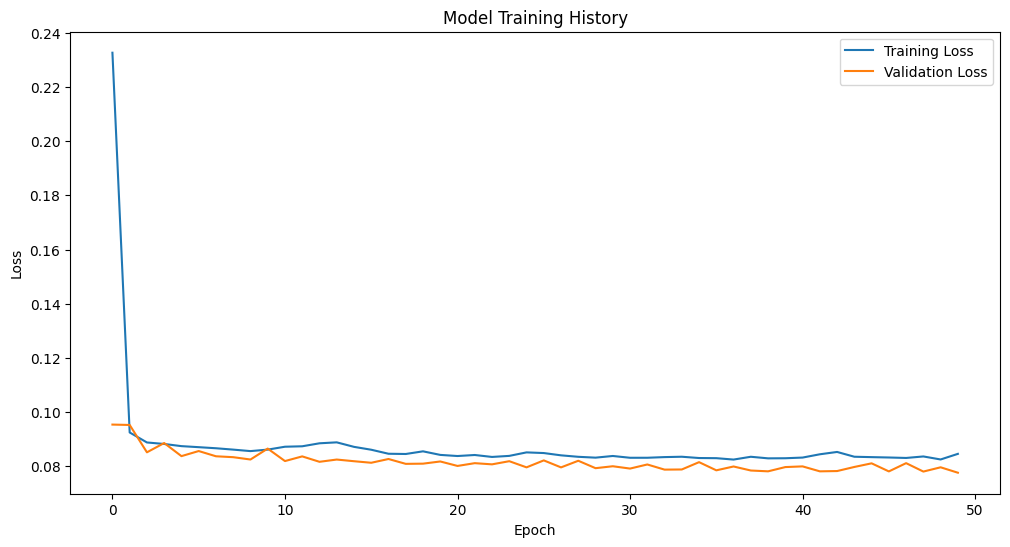

3/3 [==============================] - 0s 4ms/step
66 (437,)


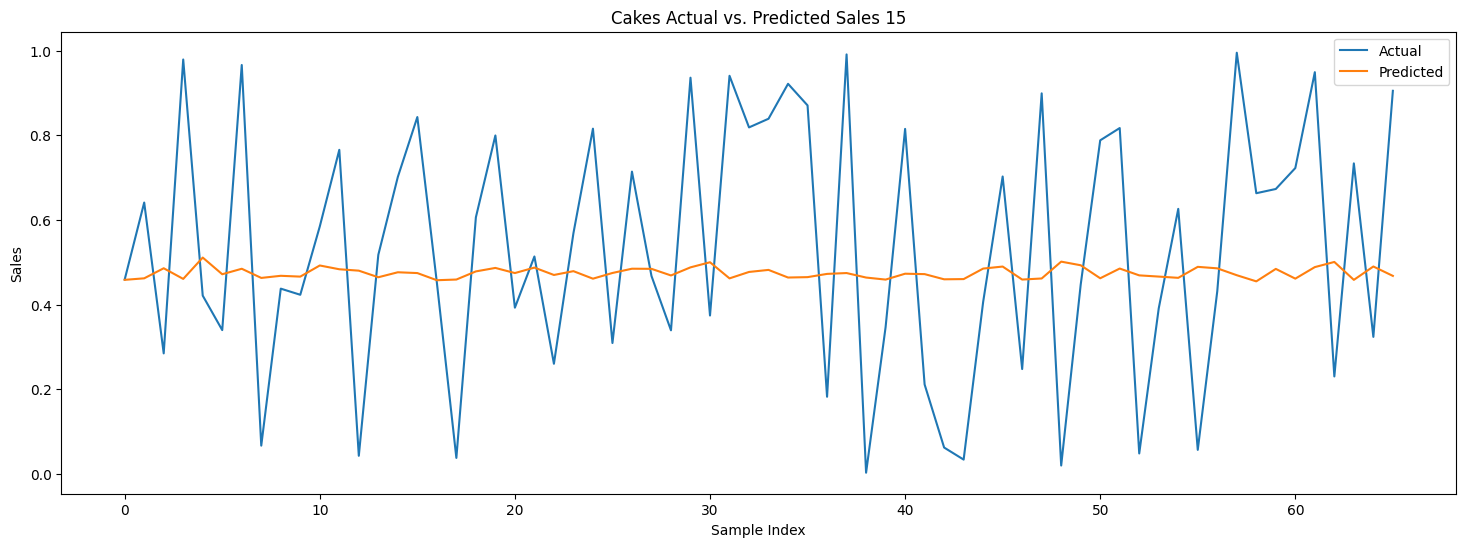

3570 (714, 5, 1, 1)
Epoch 1/50
16/16 [==============================] - 2s 28ms/step - loss: 0.1803 - val_loss: 0.0861
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0980 - val_loss: 0.0864
Epoch 3/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0914 - val_loss: 0.0841
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0890 - val_loss: 0.0838
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0886 - val_loss: 0.0835
Epoch 6/50
16/16 [==============================] - 0s 7ms/step - loss: 0.0884 - val_loss: 0.0833
Epoch 7/50
16/16 [==============================] - 0s 10ms/step - loss: 0.0882 - val_loss: 0.0833
Epoch 8/50
16/16 [==============================] - 0s 8ms/step - loss: 0.0881 - val_loss: 0.0831
Epoch 9/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0874 - val_loss: 0.0831
Epoch 10/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0873 - val_loss: 0.08

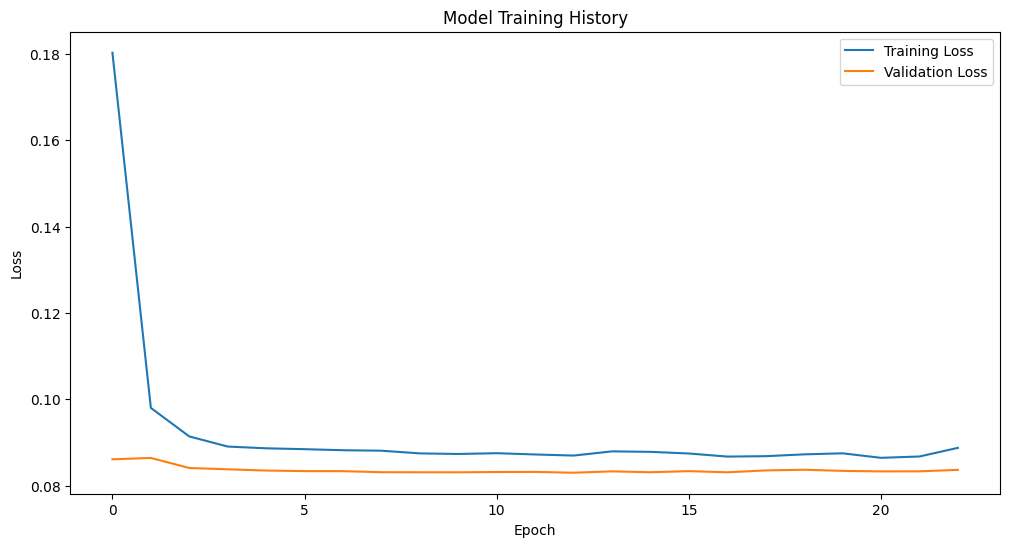

4/4 [==============================] - 0s 4ms/step
108 (714,)


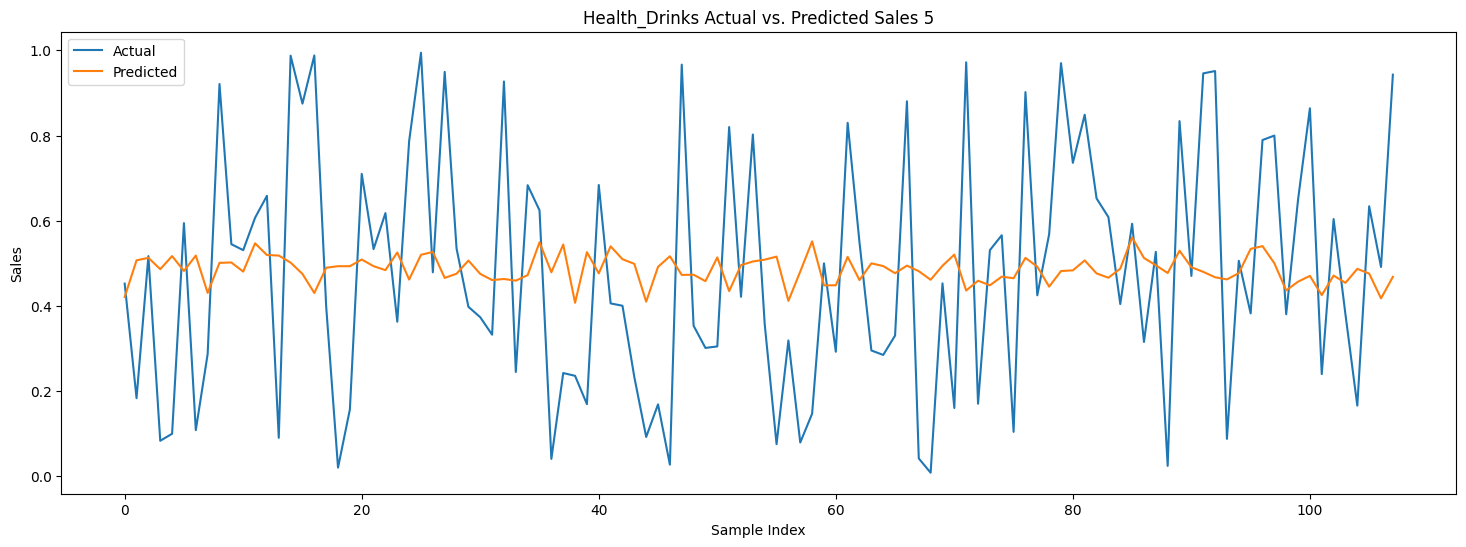

2470 (494, 5, 1, 1)
Epoch 1/50
11/11 [==============================] - 3s 55ms/step - loss: 0.2893 - val_loss: 0.2502
Epoch 2/50
11/11 [==============================] - 0s 9ms/step - loss: 0.2147 - val_loss: 0.1663
Epoch 3/50
11/11 [==============================] - 0s 9ms/step - loss: 0.1274 - val_loss: 0.0972
Epoch 4/50
11/11 [==============================] - 0s 8ms/step - loss: 0.0911 - val_loss: 0.1005
Epoch 5/50
11/11 [==============================] - 0s 6ms/step - loss: 0.0853 - val_loss: 0.0969
Epoch 6/50
11/11 [==============================] - 0s 8ms/step - loss: 0.0844 - val_loss: 0.0967
Epoch 7/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0842 - val_loss: 0.0959
Epoch 8/50
11/11 [==============================] - 0s 8ms/step - loss: 0.0840 - val_loss: 0.0953
Epoch 9/50
11/11 [==============================] - 0s 8ms/step - loss: 0.0839 - val_loss: 0.0952
Epoch 10/50
11/11 [==============================] - 0s 8ms/step - loss: 0.0841 - val_loss: 0.095

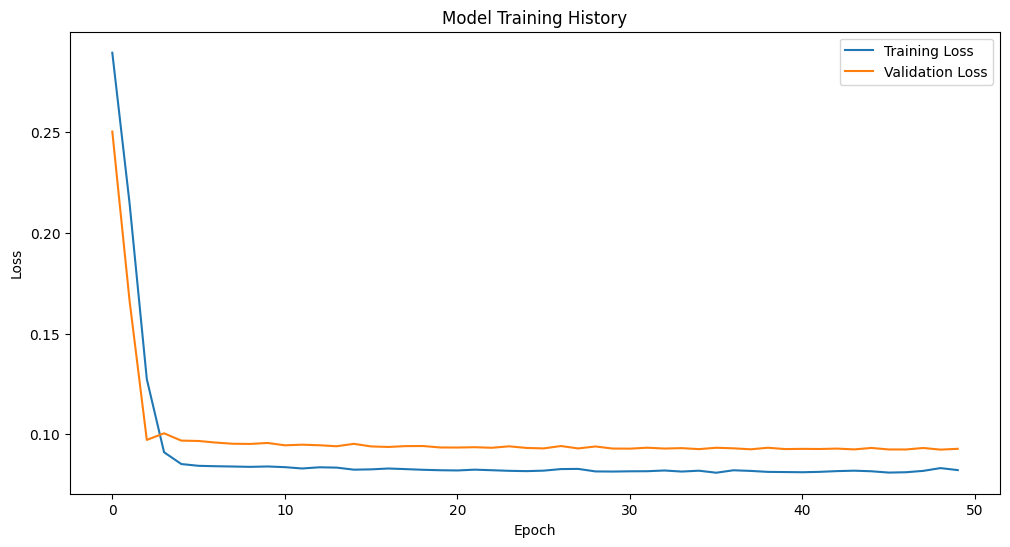

3/3 [==============================] - 0s 4ms/step
75 (494,)


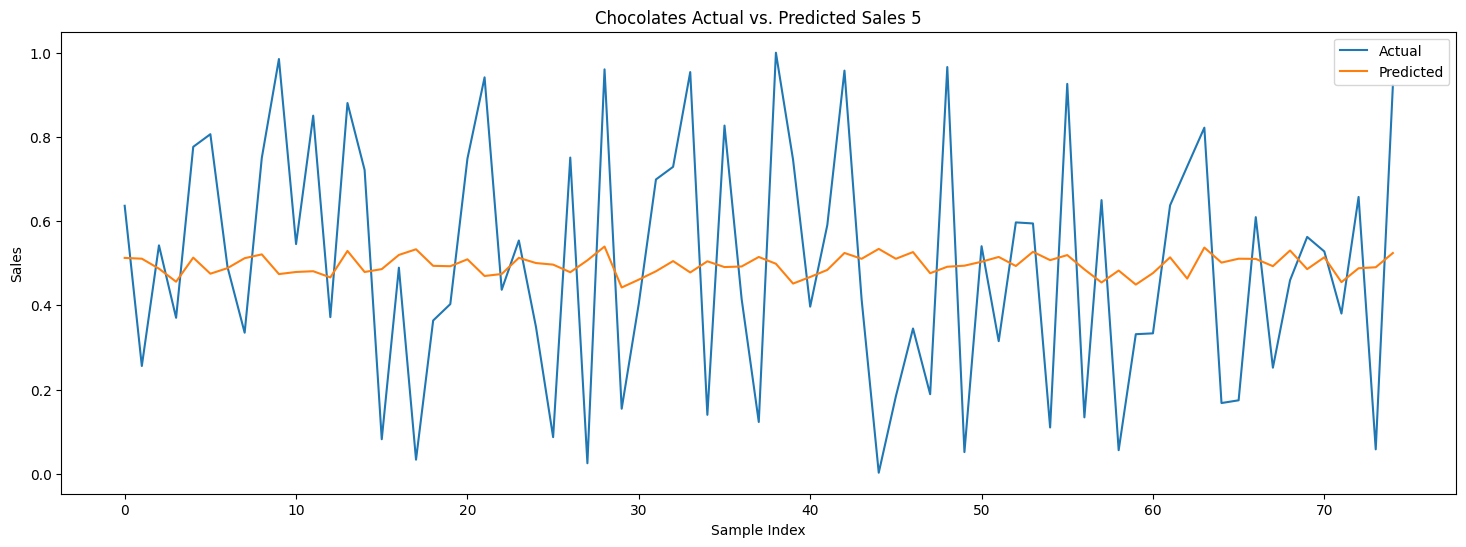

5310 (354, 15, 1, 1)
Epoch 1/50
8/8 [==============================] - 2s 64ms/step - loss: 0.3086 - val_loss: 0.2586
Epoch 2/50
8/8 [==============================] - 0s 21ms/step - loss: 0.1794 - val_loss: 0.1046
Epoch 3/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0919 - val_loss: 0.0884
Epoch 4/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0901 - val_loss: 0.0879
Epoch 5/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0904 - val_loss: 0.0857
Epoch 6/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0858 - val_loss: 0.0817
Epoch 7/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0887 - val_loss: 0.0833
Epoch 8/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0866 - val_loss: 0.0822
Epoch 9/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0859 - val_loss: 0.0817
Epoch 10/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0862 - val_loss: 0.0818
Epoch 11

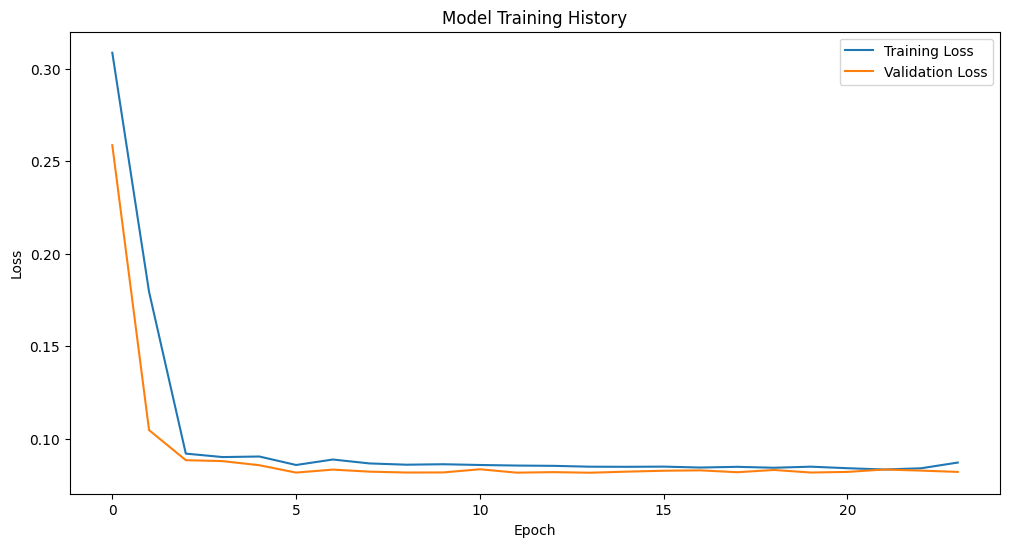

2/2 [==============================] - 0s 6ms/step
54 (354,)


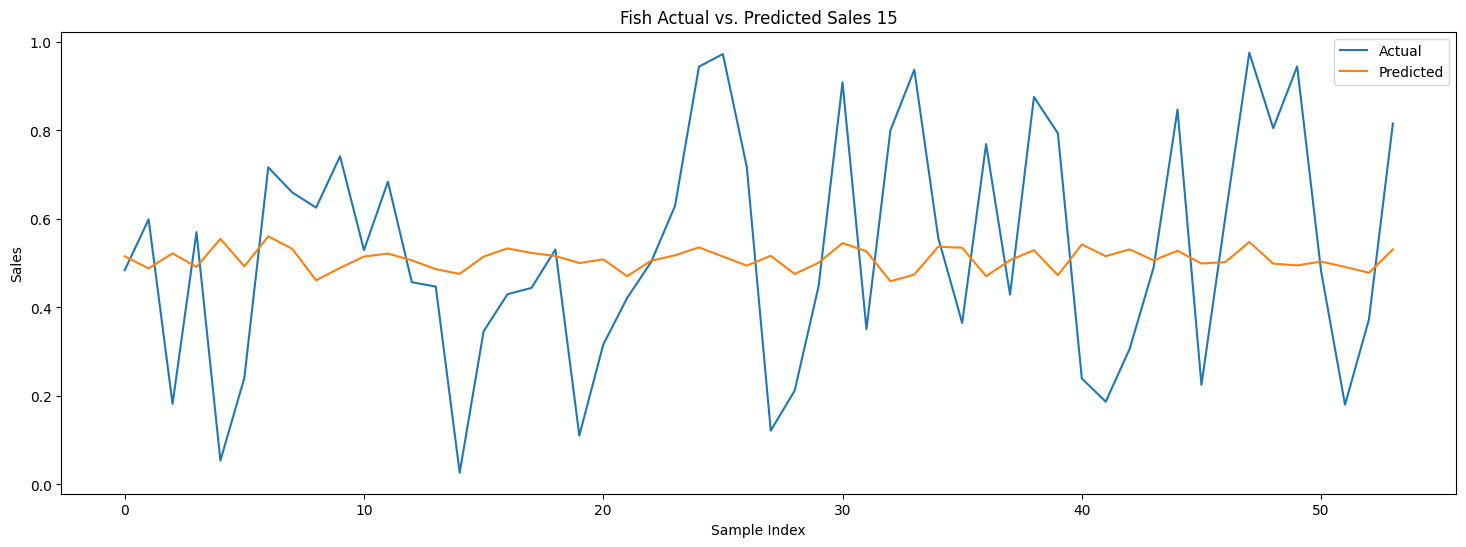

6720 (448, 15, 1, 1)
Epoch 1/50
10/10 [==============================] - 2s 50ms/step - loss: 0.1766 - val_loss: 0.0881
Epoch 2/50
10/10 [==============================] - 0s 12ms/step - loss: 0.1087 - val_loss: 0.1027
Epoch 3/50
10/10 [==============================] - 0s 10ms/step - loss: 0.0955 - val_loss: 0.0934
Epoch 4/50
10/10 [==============================] - 0s 9ms/step - loss: 0.0892 - val_loss: 0.0858
Epoch 5/50
10/10 [==============================] - 0s 11ms/step - loss: 0.0900 - val_loss: 0.0898
Epoch 6/50
10/10 [==============================] - 0s 9ms/step - loss: 0.0893 - val_loss: 0.0903
Epoch 7/50
10/10 [==============================] - 0s 9ms/step - loss: 0.0890 - val_loss: 0.0882
Epoch 8/50
10/10 [==============================] - 0s 10ms/step - loss: 0.0902 - val_loss: 0.0910
Epoch 9/50
10/10 [==============================] - 0s 11ms/step - loss: 0.0894 - val_loss: 0.0894
Epoch 10/50
10/10 [==============================] - 0s 10ms/step - loss: 0.0897 - val_loss

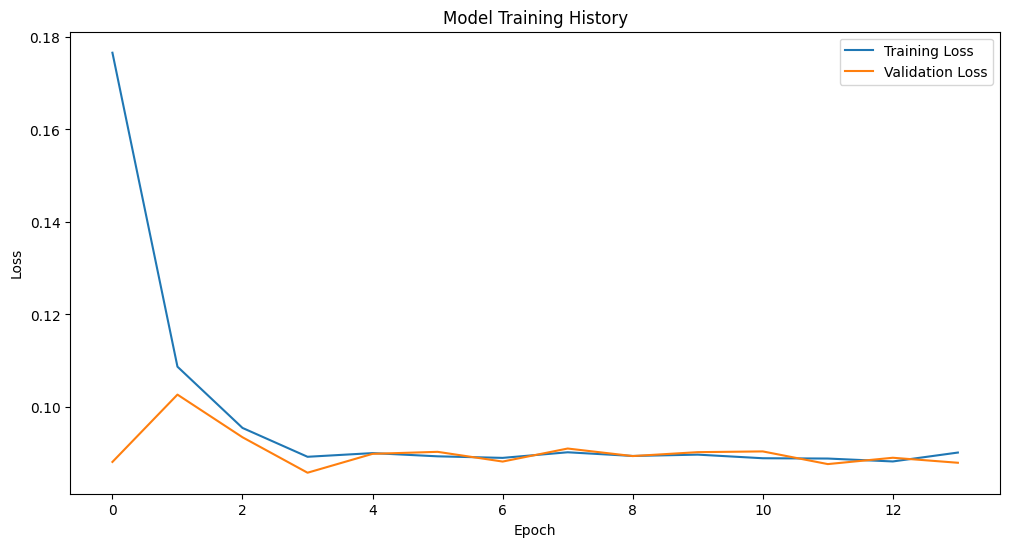

3/3 [==============================] - 0s 17ms/step
68 (448,)


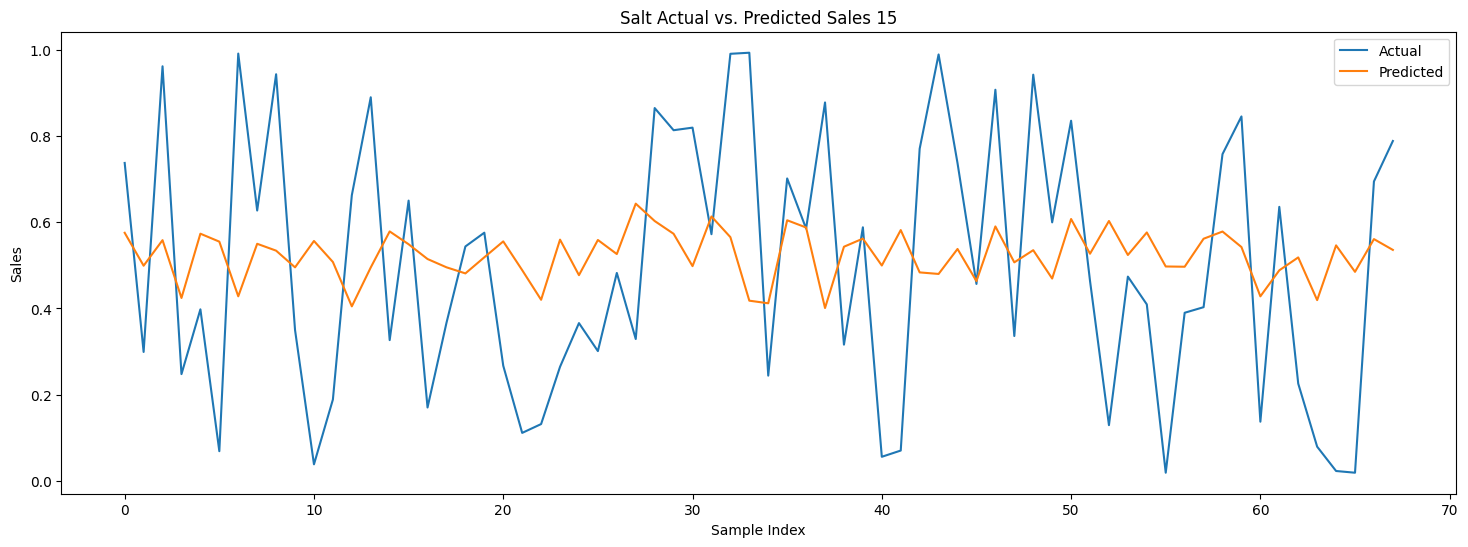

4850 (485, 10, 1, 1)
Epoch 1/50
11/11 [==============================] - 3s 49ms/step - loss: 0.2244 - val_loss: 0.1170
Epoch 2/50
11/11 [==============================] - 0s 16ms/step - loss: 0.0984 - val_loss: 0.0858
Epoch 3/50
11/11 [==============================] - 0s 12ms/step - loss: 0.0915 - val_loss: 0.0853
Epoch 4/50
11/11 [==============================] - 0s 14ms/step - loss: 0.0908 - val_loss: 0.0799
Epoch 5/50
11/11 [==============================] - 0s 12ms/step - loss: 0.0904 - val_loss: 0.0792
Epoch 6/50
11/11 [==============================] - 0s 16ms/step - loss: 0.0895 - val_loss: 0.0809
Epoch 7/50
11/11 [==============================] - 0s 12ms/step - loss: 0.0886 - val_loss: 0.0788
Epoch 8/50
11/11 [==============================] - 0s 19ms/step - loss: 0.0882 - val_loss: 0.0796
Epoch 9/50
11/11 [==============================] - 0s 18ms/step - loss: 0.0880 - val_loss: 0.0794
Epoch 10/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0881 - val_lo

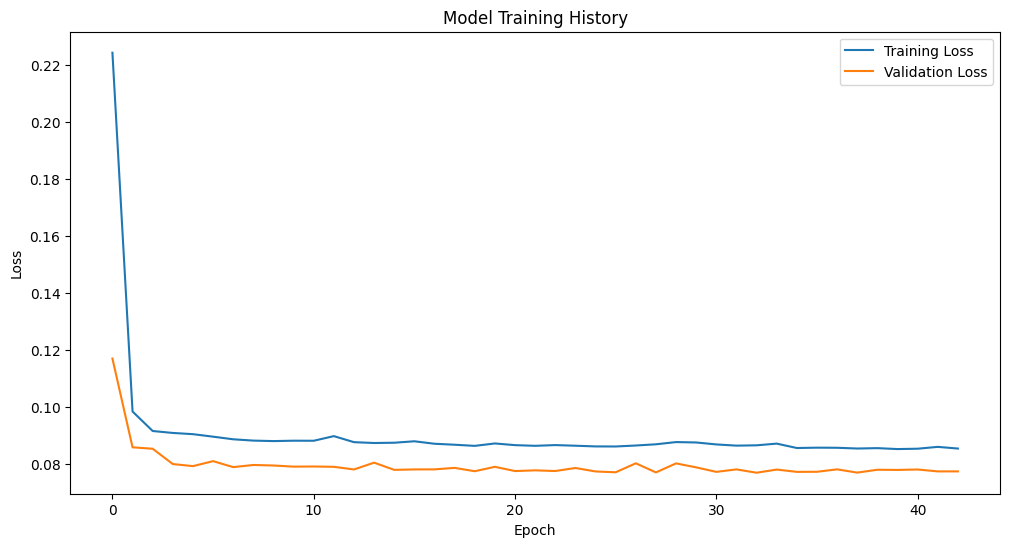

3/3 [==============================] - 0s 4ms/step
73 (485,)


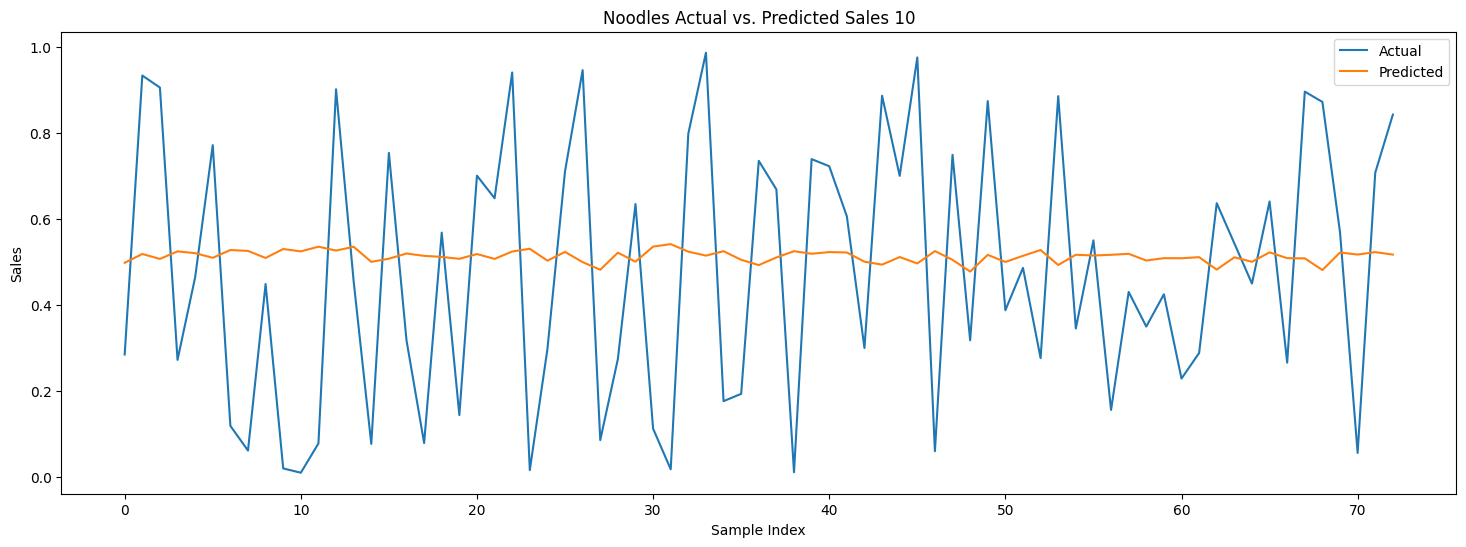

2575 (515, 5, 1, 1)
Epoch 1/50
12/12 [==============================] - 3s 45ms/step - loss: 0.1871 - val_loss: 0.1384
Epoch 2/50
12/12 [==============================] - 0s 9ms/step - loss: 0.0868 - val_loss: 0.0858
Epoch 3/50
12/12 [==============================] - 0s 11ms/step - loss: 0.0857 - val_loss: 0.1003
Epoch 4/50
12/12 [==============================] - 0s 9ms/step - loss: 0.0816 - val_loss: 0.0938
Epoch 5/50
12/12 [==============================] - 0s 9ms/step - loss: 0.0811 - val_loss: 0.0948
Epoch 6/50
12/12 [==============================] - 0s 9ms/step - loss: 0.0801 - val_loss: 0.0929
Epoch 7/50
12/12 [==============================] - 0s 10ms/step - loss: 0.0794 - val_loss: 0.0942
Epoch 8/50
12/12 [==============================] - 0s 12ms/step - loss: 0.0791 - val_loss: 0.0930
Epoch 9/50
12/12 [==============================] - 0s 9ms/step - loss: 0.0786 - val_loss: 0.0940
Epoch 10/50
12/12 [==============================] - 0s 10ms/step - loss: 0.0784 - val_loss: 0

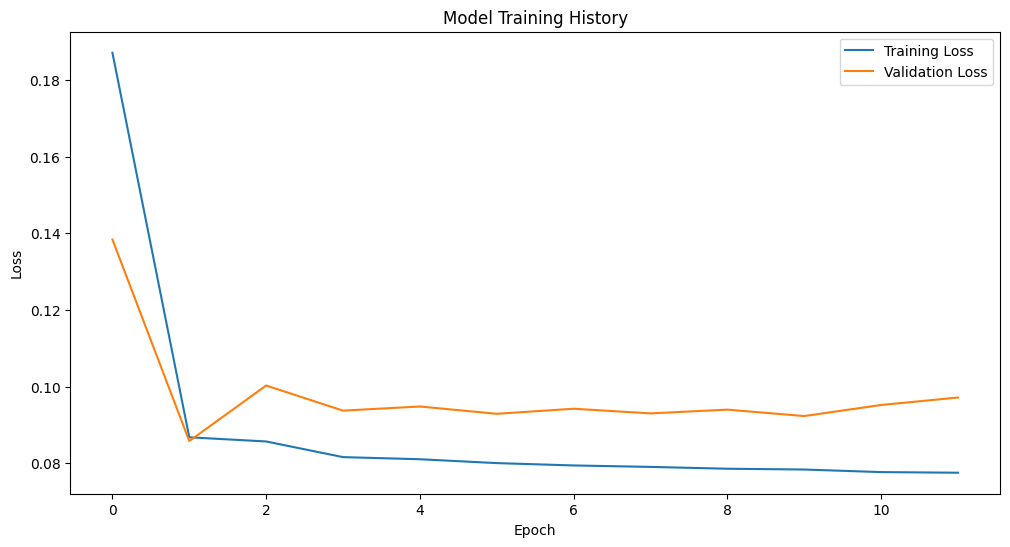

3/3 [==============================] - 0s 3ms/step
78 (515,)


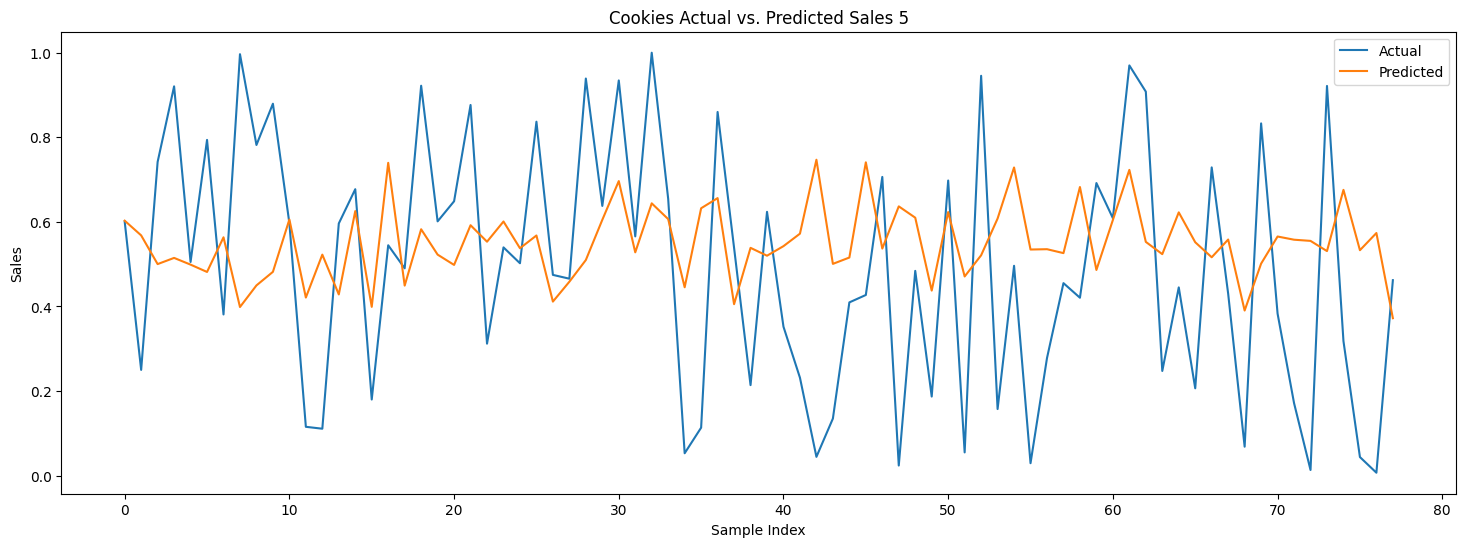

3370 (337, 10, 1, 1)
Epoch 1/50
8/8 [==============================] - 3s 100ms/step - loss: 0.2695 - val_loss: 0.3062
Epoch 2/50
8/8 [==============================] - 0s 27ms/step - loss: 0.1514 - val_loss: 0.1238
Epoch 3/50
8/8 [==============================] - 0s 39ms/step - loss: 0.0997 - val_loss: 0.0927
Epoch 4/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0901 - val_loss: 0.1300
Epoch 5/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0914 - val_loss: 0.1217
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0879 - val_loss: 0.1010
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0871 - val_loss: 0.1059
Epoch 8/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0863 - val_loss: 0.1076
Epoch 9/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0867 - val_loss: 0.1111
Epoch 10/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0860 - val_loss: 0.1017
Epoch 11/

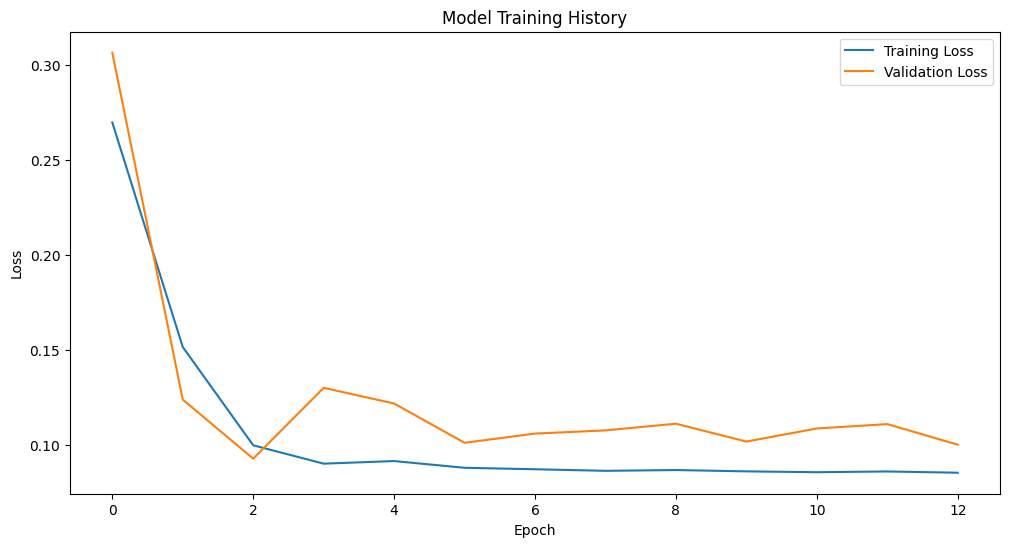

2/2 [==============================] - 0s 7ms/step
51 (337,)


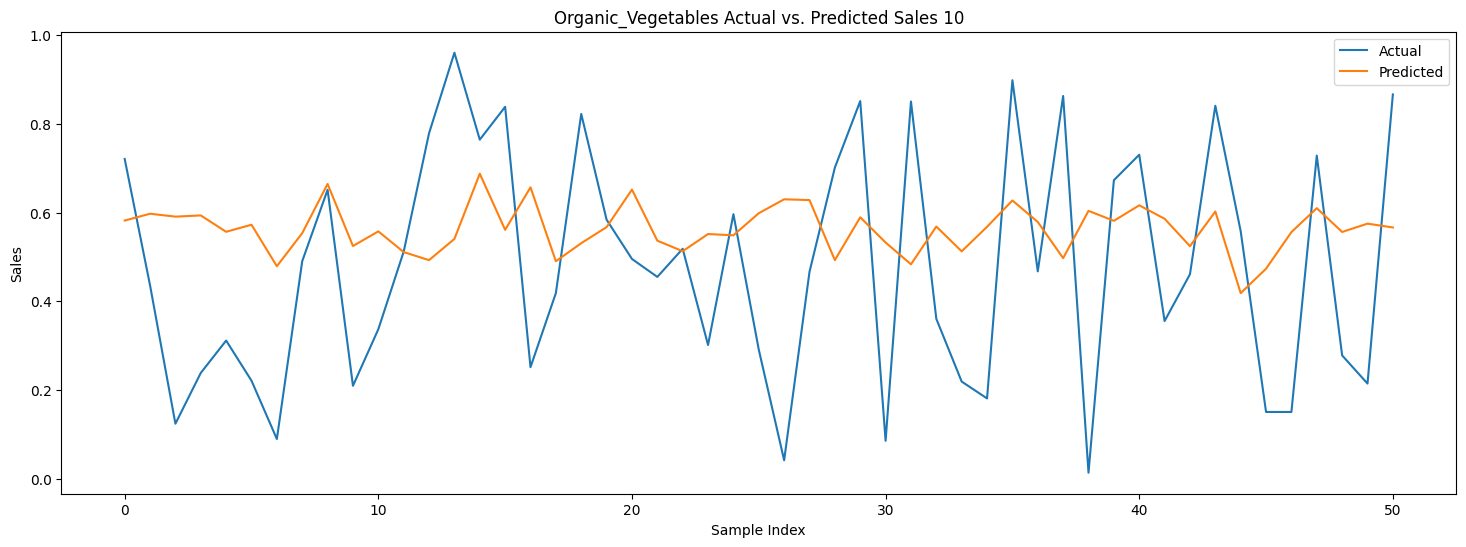

1740 (348, 5, 1, 1)
Epoch 1/50
8/8 [==============================] - 3s 107ms/step - loss: 0.2949 - val_loss: 0.2470
Epoch 2/50
8/8 [==============================] - 0s 18ms/step - loss: 0.2113 - val_loss: 0.1508
Epoch 3/50
8/8 [==============================] - 0s 20ms/step - loss: 0.1222 - val_loss: 0.0704
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0932 - val_loss: 0.0770
Epoch 5/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0923 - val_loss: 0.0680
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0876 - val_loss: 0.0688
Epoch 7/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0879 - val_loss: 0.0663
Epoch 8/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0865 - val_loss: 0.0663
Epoch 9/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0862 - val_loss: 0.0665
Epoch 10/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0860 - val_loss: 0.0660
Epoch 11/5

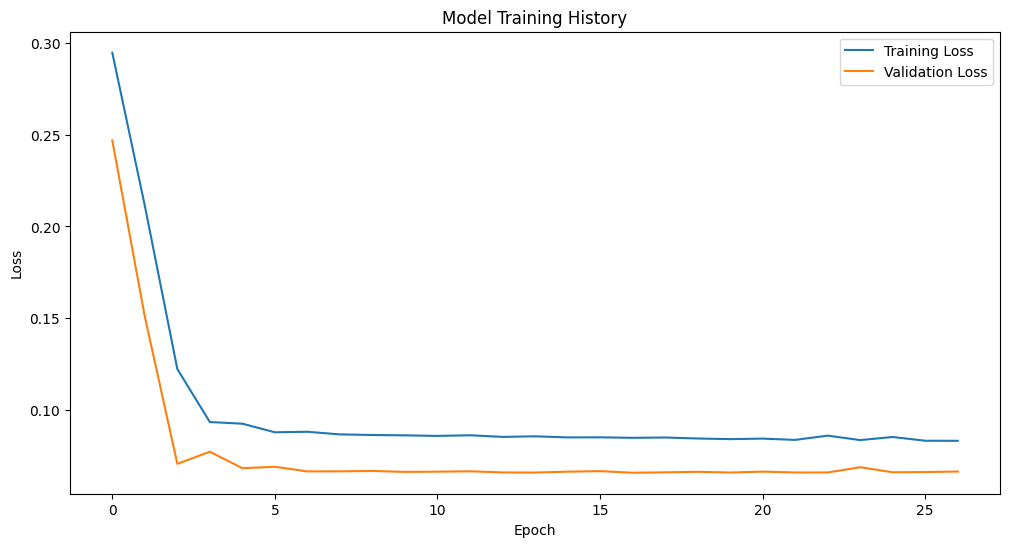

2/2 [==============================] - 0s 5ms/step
53 (348,)


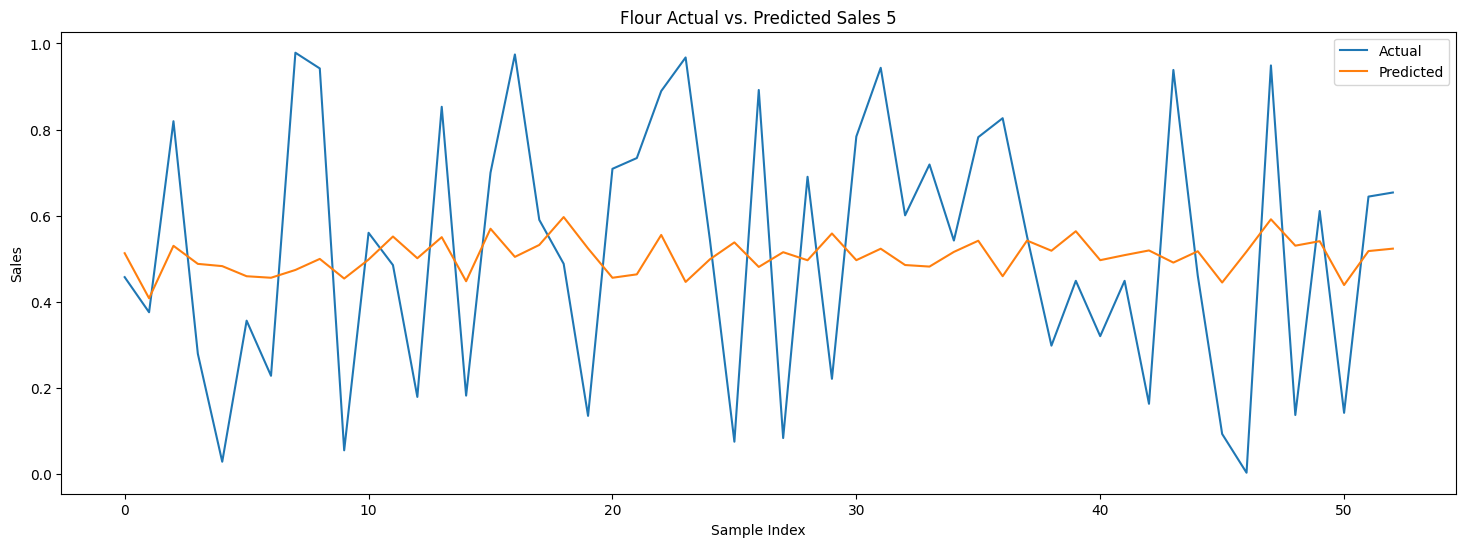

4410 (441, 10, 1, 1)
Epoch 1/50
10/10 [==============================] - 2s 54ms/step - loss: 0.3087 - val_loss: 0.2686
Epoch 2/50
10/10 [==============================] - 0s 11ms/step - loss: 0.2388 - val_loss: 0.1642
Epoch 3/50
10/10 [==============================] - 0s 14ms/step - loss: 0.1210 - val_loss: 0.0941
Epoch 4/50
10/10 [==============================] - 0s 12ms/step - loss: 0.0970 - val_loss: 0.0754
Epoch 5/50
10/10 [==============================] - 0s 9ms/step - loss: 0.0899 - val_loss: 0.0723
Epoch 6/50
10/10 [==============================] - 0s 11ms/step - loss: 0.0879 - val_loss: 0.0716
Epoch 7/50
10/10 [==============================] - 0s 10ms/step - loss: 0.0852 - val_loss: 0.0716
Epoch 8/50
10/10 [==============================] - 0s 10ms/step - loss: 0.0858 - val_loss: 0.0713
Epoch 9/50
10/10 [==============================] - 0s 9ms/step - loss: 0.0870 - val_loss: 0.0712
Epoch 10/50
10/10 [==============================] - 0s 10ms/step - loss: 0.0859 - val_los

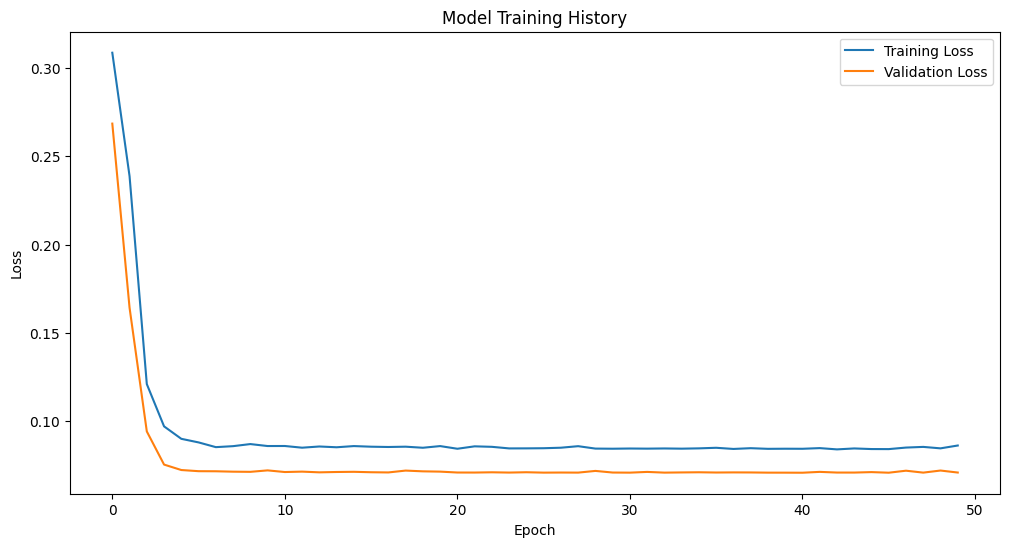

3/3 [==============================] - 0s 5ms/step
67 (441,)


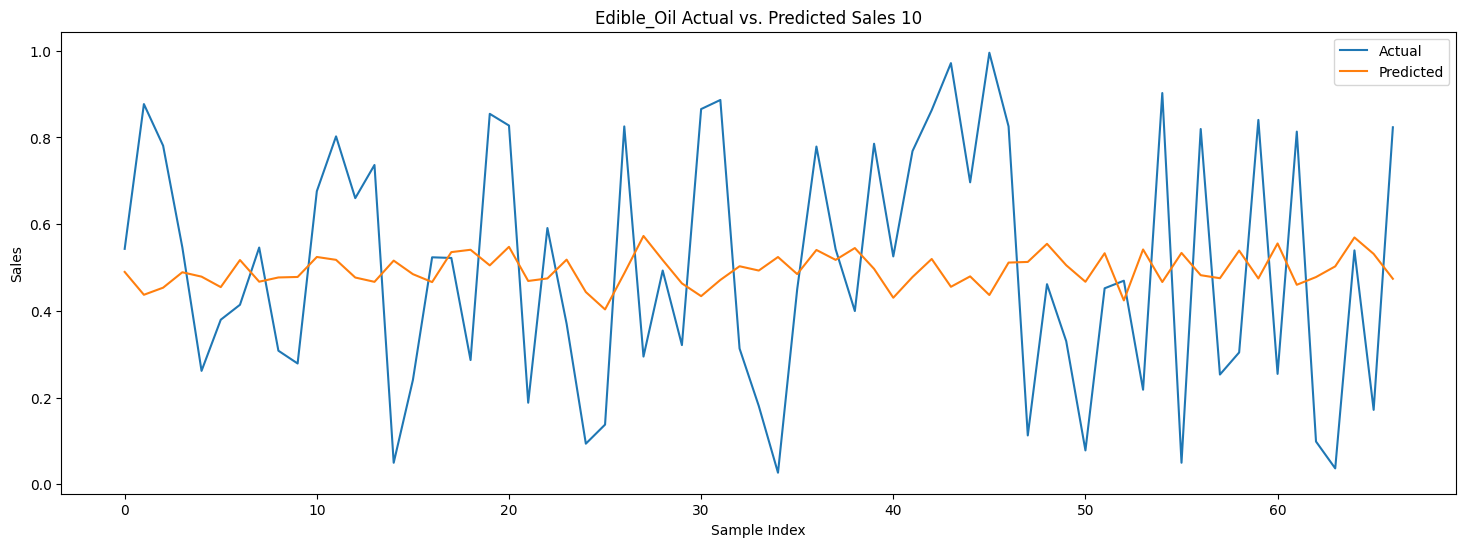

3380 (338, 10, 1, 1)
Epoch 1/50
8/8 [==============================] - 2s 59ms/step - loss: 0.2829 - val_loss: 0.1738
Epoch 2/50
8/8 [==============================] - 0s 13ms/step - loss: 0.1379 - val_loss: 0.1047
Epoch 3/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0956 - val_loss: 0.1065
Epoch 4/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0900 - val_loss: 0.0981
Epoch 5/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0887 - val_loss: 0.1011
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0872 - val_loss: 0.0997
Epoch 7/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0871 - val_loss: 0.0996
Epoch 8/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0878 - val_loss: 0.0967
Epoch 9/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0863 - val_loss: 0.1004
Epoch 10/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0860 - val_loss: 0.0965
Epoch 11/50

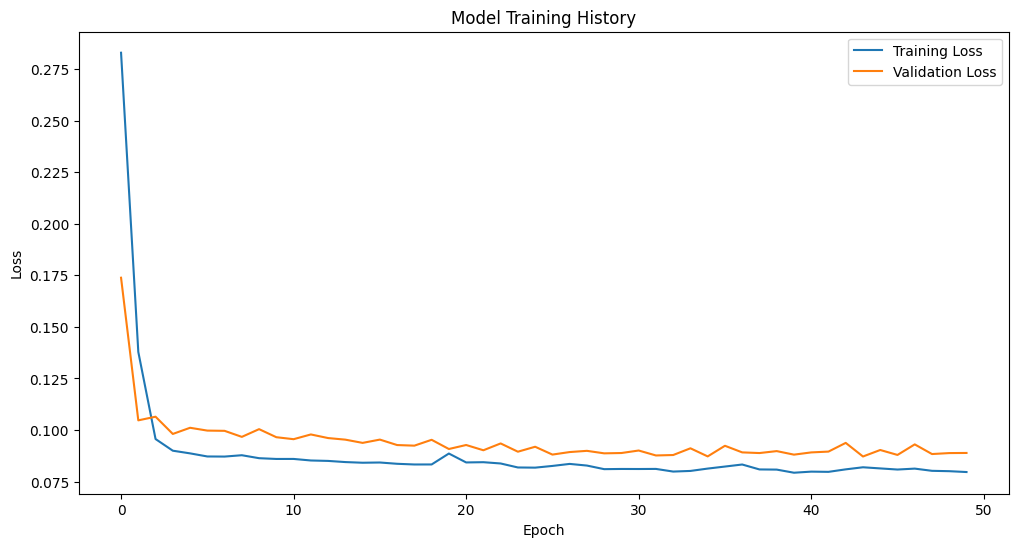

2/2 [==============================] - 0s 8ms/step
51 (338,)


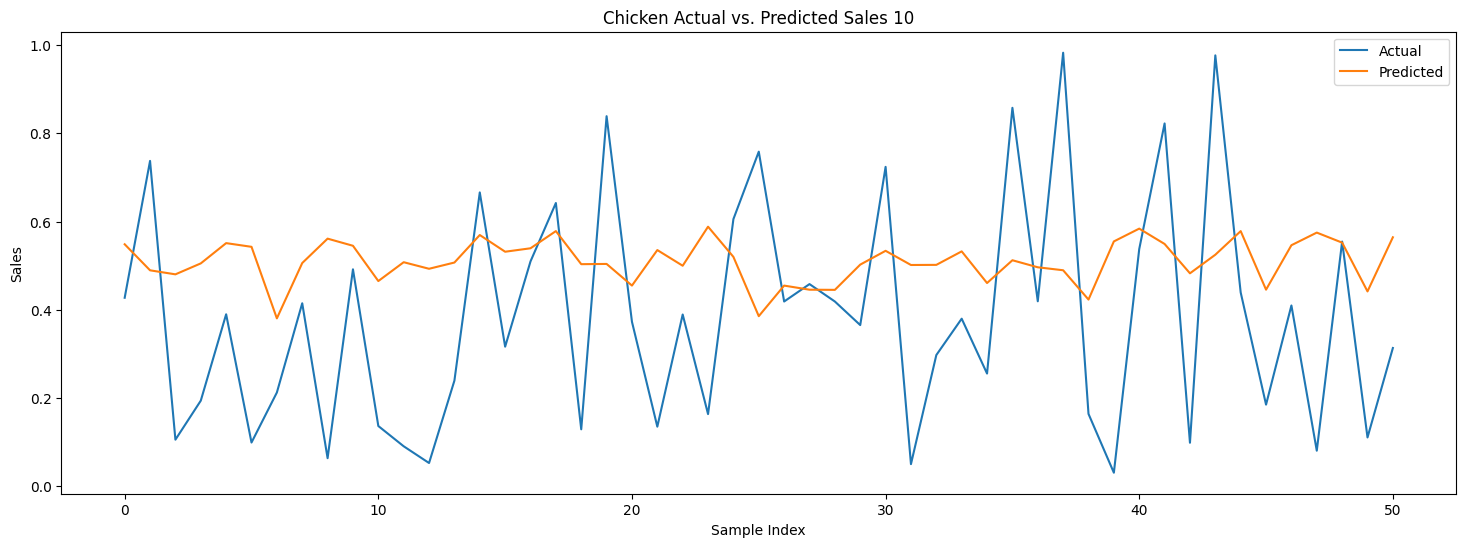

4490 (449, 10, 1, 1)
Epoch 1/50
10/10 [==============================] - 2s 49ms/step - loss: 0.2228 - val_loss: 0.1521
Epoch 2/50
10/10 [==============================] - 0s 12ms/step - loss: 0.1131 - val_loss: 0.1200
Epoch 3/50
10/10 [==============================] - 0s 10ms/step - loss: 0.1022 - val_loss: 0.1116
Epoch 4/50
10/10 [==============================] - 0s 10ms/step - loss: 0.1016 - val_loss: 0.1081
Epoch 5/50
10/10 [==============================] - 0s 10ms/step - loss: 0.0966 - val_loss: 0.1046
Epoch 6/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0979 - val_loss: 0.1040
Epoch 7/50
10/10 [==============================] - 0s 10ms/step - loss: 0.0963 - val_loss: 0.1042
Epoch 8/50
10/10 [==============================] - 0s 10ms/step - loss: 0.0951 - val_loss: 0.1028
Epoch 9/50
10/10 [==============================] - 0s 9ms/step - loss: 0.0950 - val_loss: 0.1027
Epoch 10/50
10/10 [==============================] - 0s 10ms/step - loss: 0.0941 - val_los

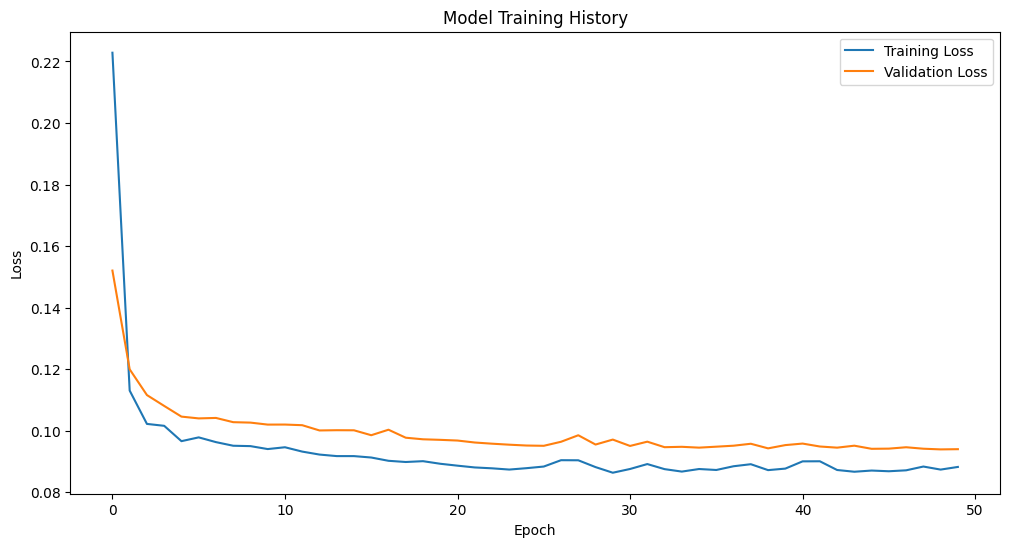

3/3 [==============================] - 0s 5ms/step
68 (449,)


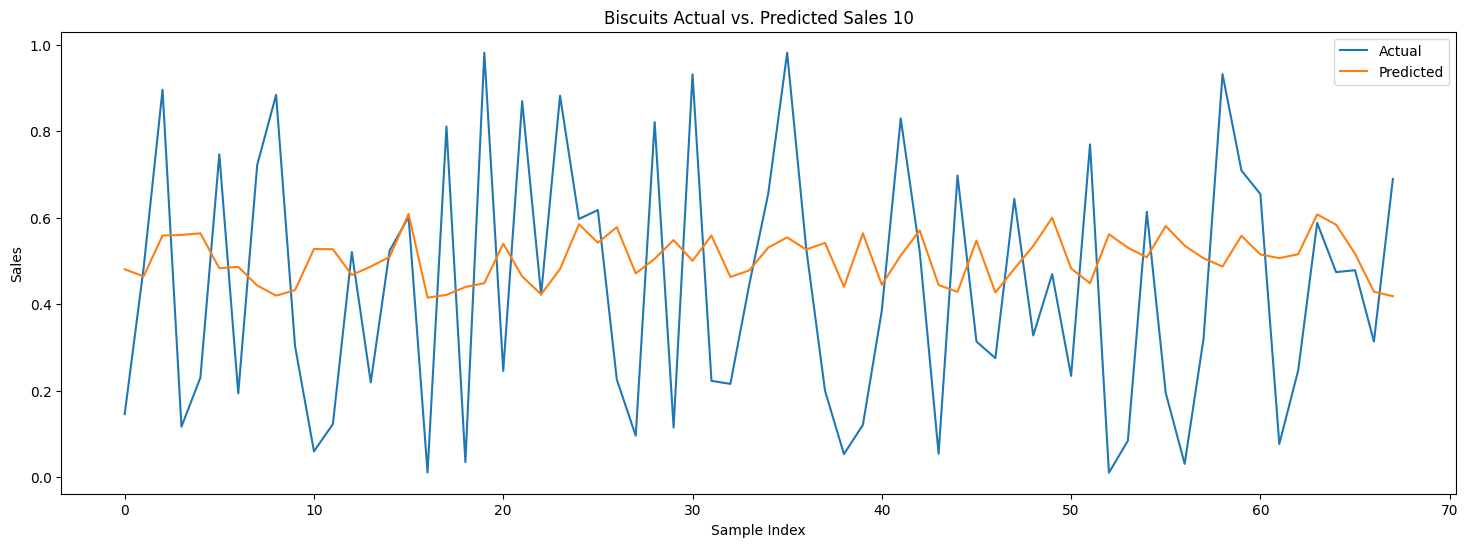

3330 (333, 10, 1, 1)
Epoch 1/50
8/8 [==============================] - 3s 61ms/step - loss: 0.2400 - val_loss: 0.1202
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0946 - val_loss: 0.1383
Epoch 3/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0935 - val_loss: 0.0987
Epoch 4/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0885 - val_loss: 0.0979
Epoch 5/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0849 - val_loss: 0.1026
Epoch 6/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0840 - val_loss: 0.1007
Epoch 7/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0833 - val_loss: 0.0984
Epoch 8/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0834 - val_loss: 0.0976
Epoch 9/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0836 - val_loss: 0.1016
Epoch 10/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0848 - val_loss: 0.0973
Epoch 11/5

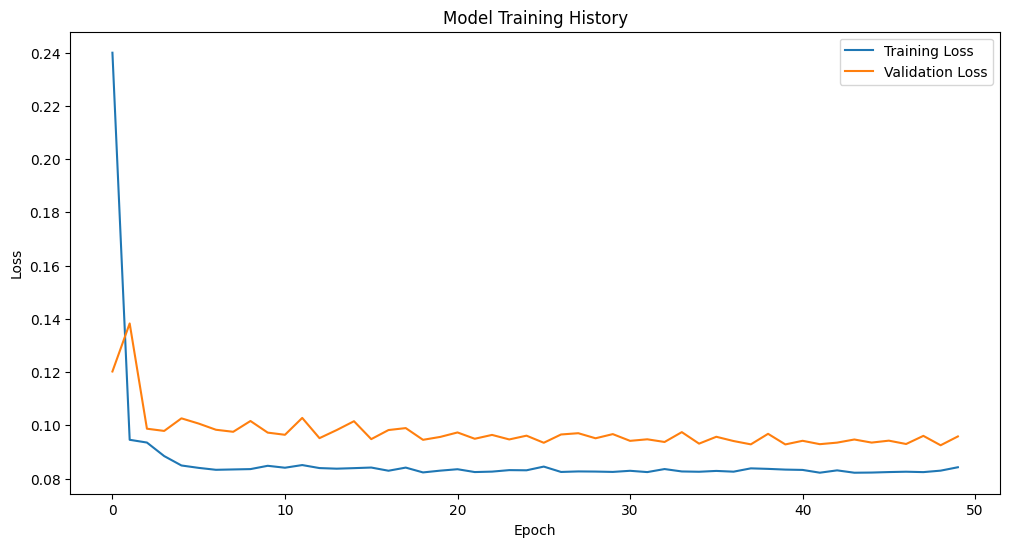

2/2 [==============================] - 0s 7ms/step
50 (333,)


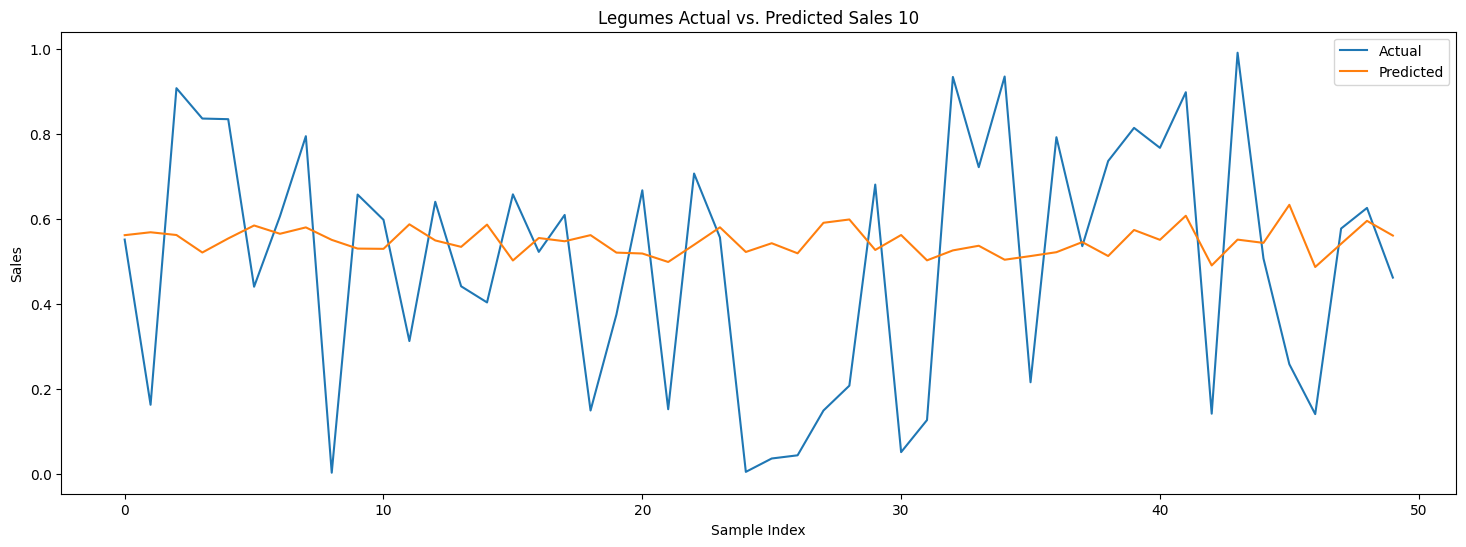

4370 (437, 10, 1, 1)
Epoch 1/50
10/10 [==============================] - 2s 48ms/step - loss: 0.2543 - val_loss: 0.1894
Epoch 2/50
10/10 [==============================] - 0s 9ms/step - loss: 0.0993 - val_loss: 0.1303
Epoch 3/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0885 - val_loss: 0.1251
Epoch 4/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0858 - val_loss: 0.1234
Epoch 5/50
10/10 [==============================] - 0s 9ms/step - loss: 0.0820 - val_loss: 0.1173
Epoch 6/50
10/10 [==============================] - 0s 9ms/step - loss: 0.0840 - val_loss: 0.1202
Epoch 7/50
10/10 [==============================] - 0s 12ms/step - loss: 0.0827 - val_loss: 0.1173
Epoch 8/50
10/10 [==============================] - 0s 10ms/step - loss: 0.0824 - val_loss: 0.1207
Epoch 9/50
10/10 [==============================] - 0s 10ms/step - loss: 0.0818 - val_loss: 0.1173
Epoch 10/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0817 - val_loss: 0

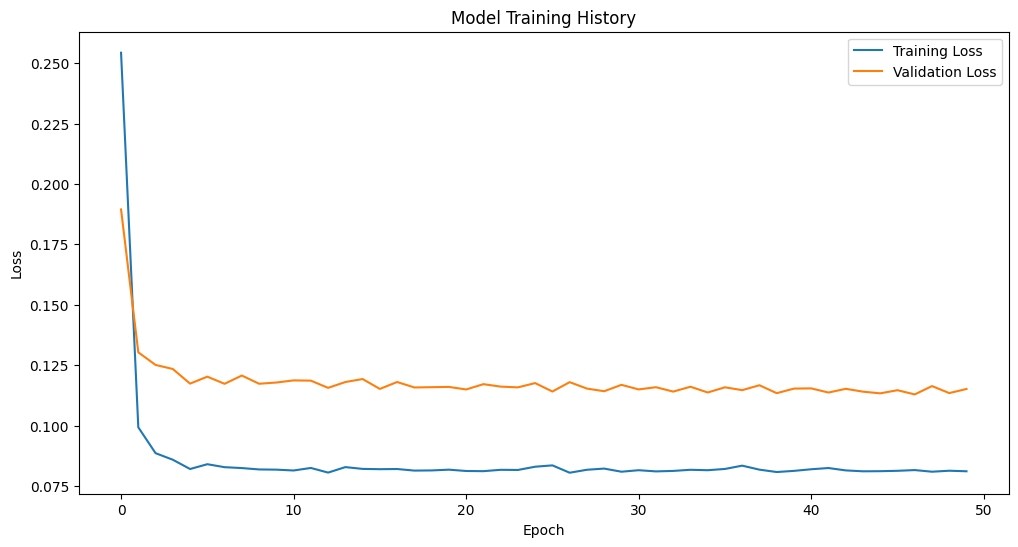

3/3 [==============================] - 0s 3ms/step
66 (437,)


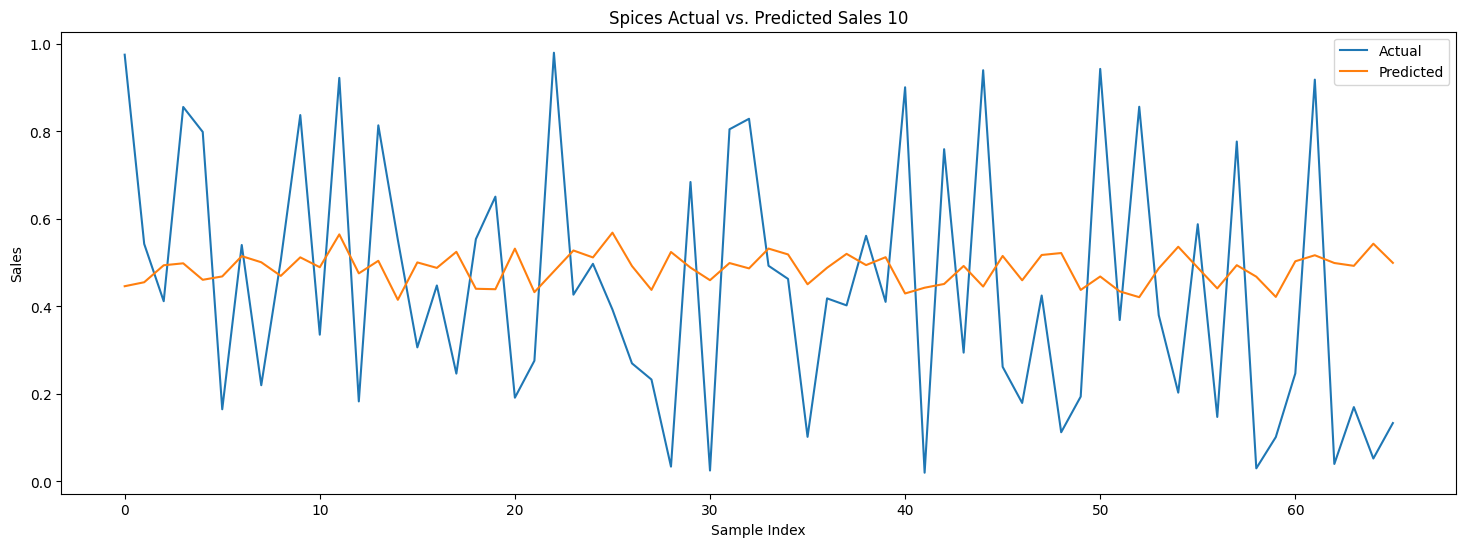

3590 (359, 10, 1, 1)
Epoch 1/50
8/8 [==============================] - 2s 62ms/step - loss: 0.2458 - val_loss: 0.2330
Epoch 2/50
8/8 [==============================] - 0s 10ms/step - loss: 0.1314 - val_loss: 0.0876
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0967 - val_loss: 0.0737
Epoch 4/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0859 - val_loss: 0.0963
Epoch 5/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0858 - val_loss: 0.0918
Epoch 6/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0839 - val_loss: 0.0765
Epoch 7/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0824 - val_loss: 0.0786
Epoch 8/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0811 - val_loss: 0.0844
Epoch 9/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0820 - val_loss: 0.0834
Epoch 10/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0815 - val_loss: 0.0786
Epoch 11/50

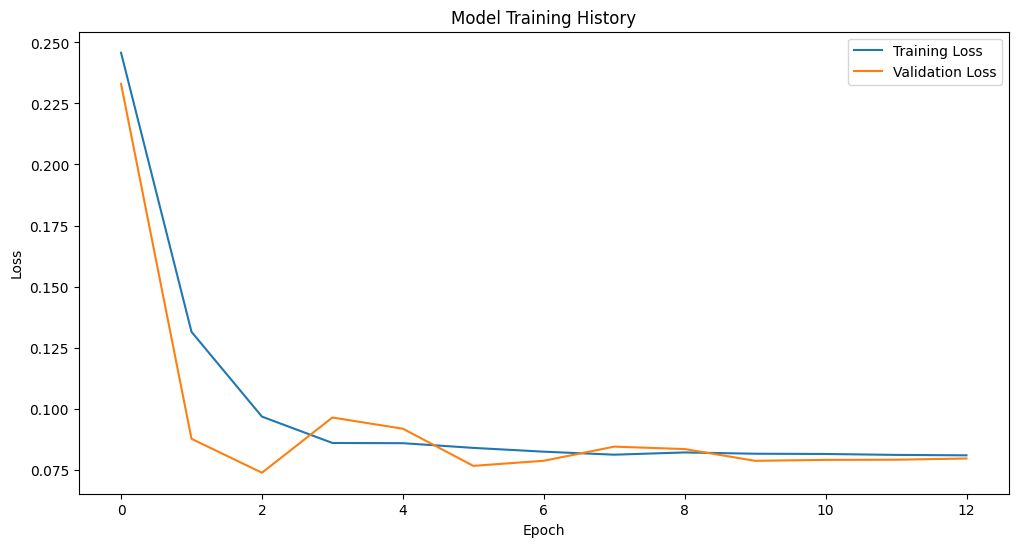

2/2 [==============================] - 0s 6ms/step
54 (359,)


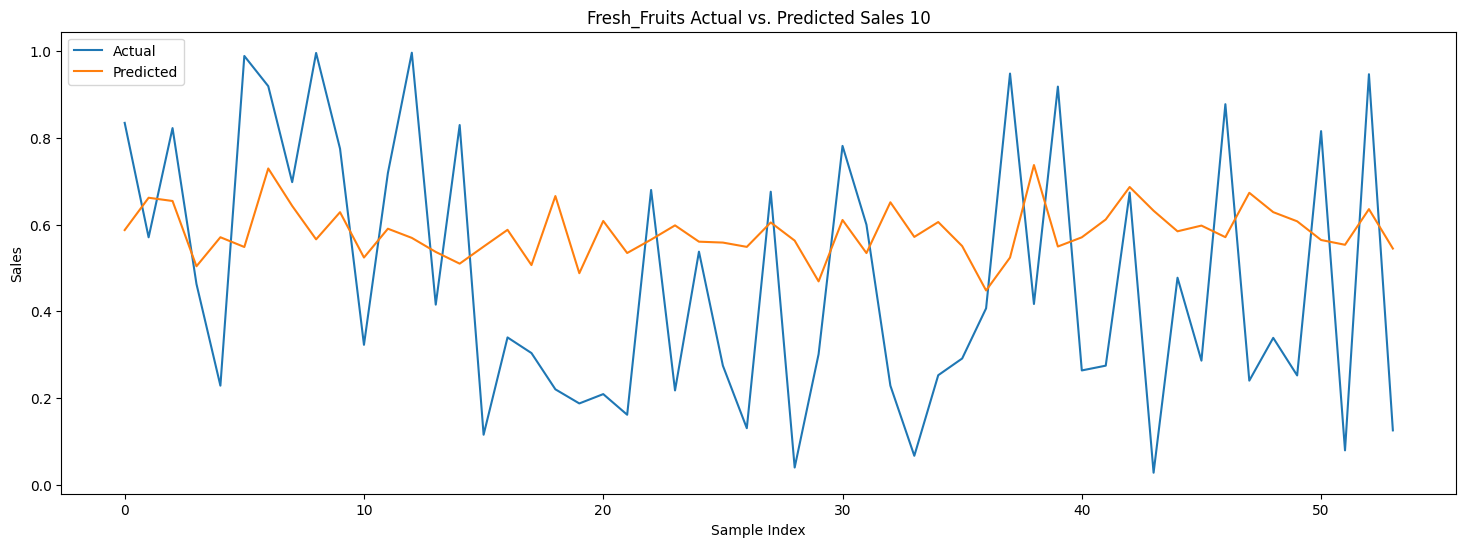

3200 (320, 10, 1, 1)
Epoch 1/50
7/7 [==============================] - 2s 70ms/step - loss: 0.3199 - val_loss: 0.2487
Epoch 2/50
7/7 [==============================] - 0s 12ms/step - loss: 0.2418 - val_loss: 0.1597
Epoch 3/50
7/7 [==============================] - 0s 11ms/step - loss: 0.1362 - val_loss: 0.0833
Epoch 4/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0955 - val_loss: 0.1067
Epoch 5/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0892 - val_loss: 0.0830
Epoch 6/50
7/7 [==============================] - 0s 13ms/step - loss: 0.0889 - val_loss: 0.0829
Epoch 7/50
7/7 [==============================] - 0s 17ms/step - loss: 0.0869 - val_loss: 0.0868
Epoch 8/50
7/7 [==============================] - 0s 14ms/step - loss: 0.0860 - val_loss: 0.0849
Epoch 9/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0867 - val_loss: 0.0824
Epoch 10/50
7/7 [==============================] - 0s 13ms/step - loss: 0.0870 - val_loss: 0.0856
Epoch 11

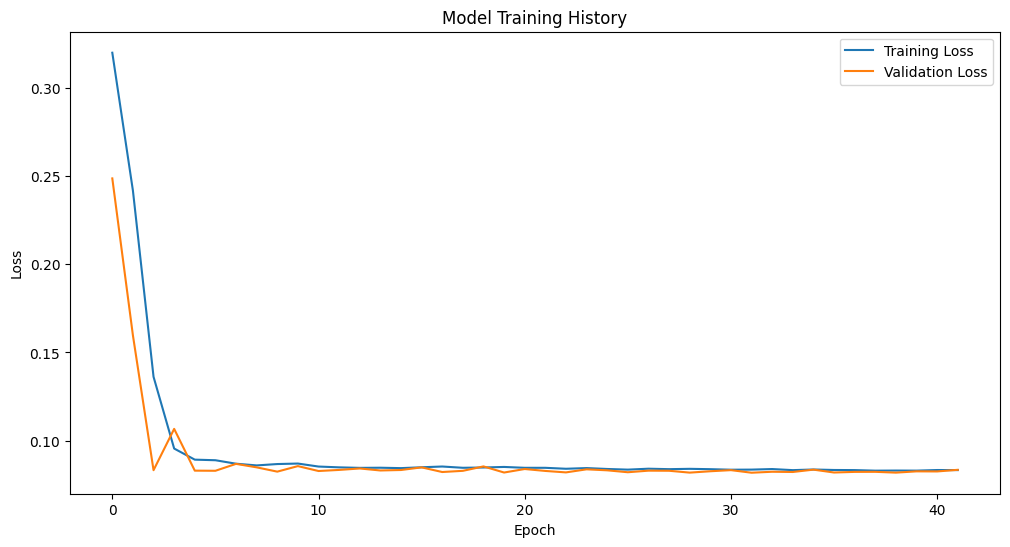

2/2 [==============================] - 0s 6ms/step
48 (320,)


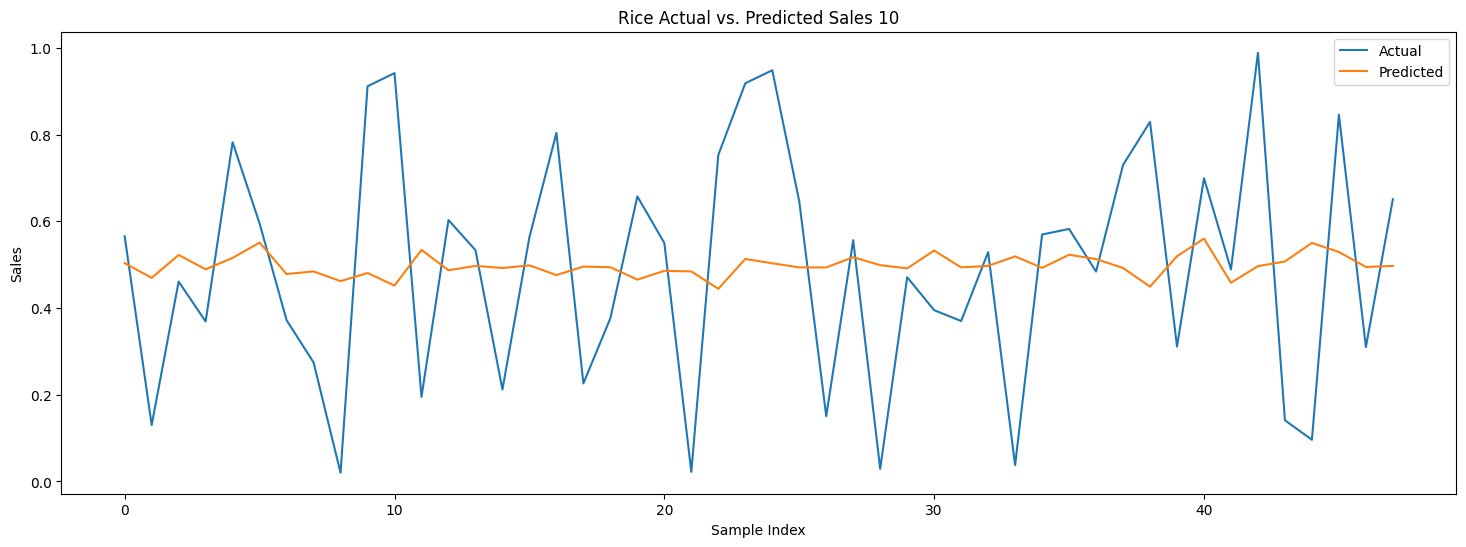

9225 (369, 25, 1, 1)
Epoch 1/50
9/9 [==============================] - 3s 61ms/step - loss: 0.3033 - val_loss: 0.1336
Epoch 2/50
9/9 [==============================] - 0s 14ms/step - loss: 0.1096 - val_loss: 0.1194
Epoch 3/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0841 - val_loss: 0.0902
Epoch 4/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0840 - val_loss: 0.1088
Epoch 5/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0852 - val_loss: 0.0935
Epoch 6/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0826 - val_loss: 0.0932
Epoch 7/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0830 - val_loss: 0.0928
Epoch 8/50
9/9 [==============================] - 0s 15ms/step - loss: 0.0822 - val_loss: 0.0963
Epoch 9/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0815 - val_loss: 0.0949
Epoch 10/50
9/9 [==============================] - 0s 13ms/step - loss: 0.0809 - val_loss: 0.0965
Epoch 11

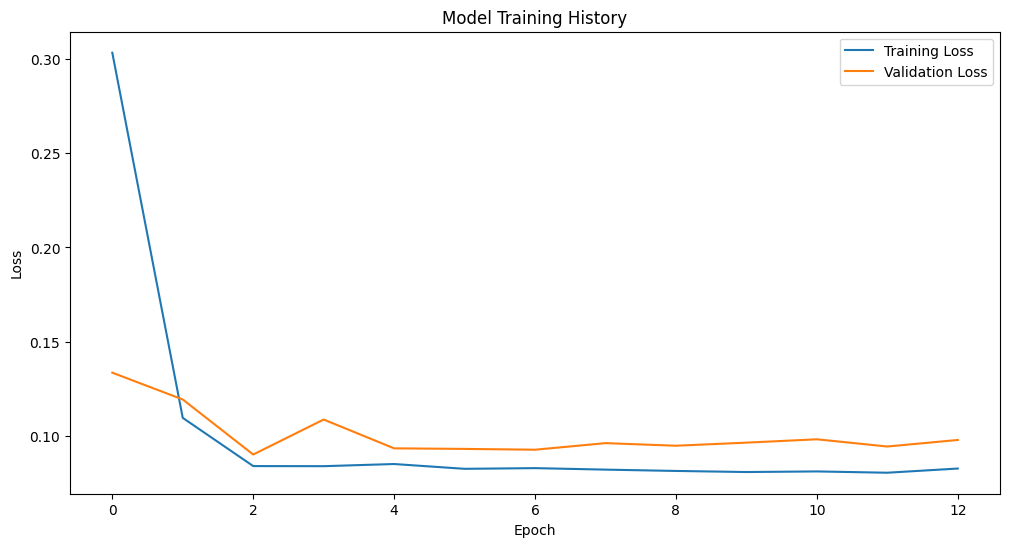

2/2 [==============================] - 0s 6ms/step
56 (369,)


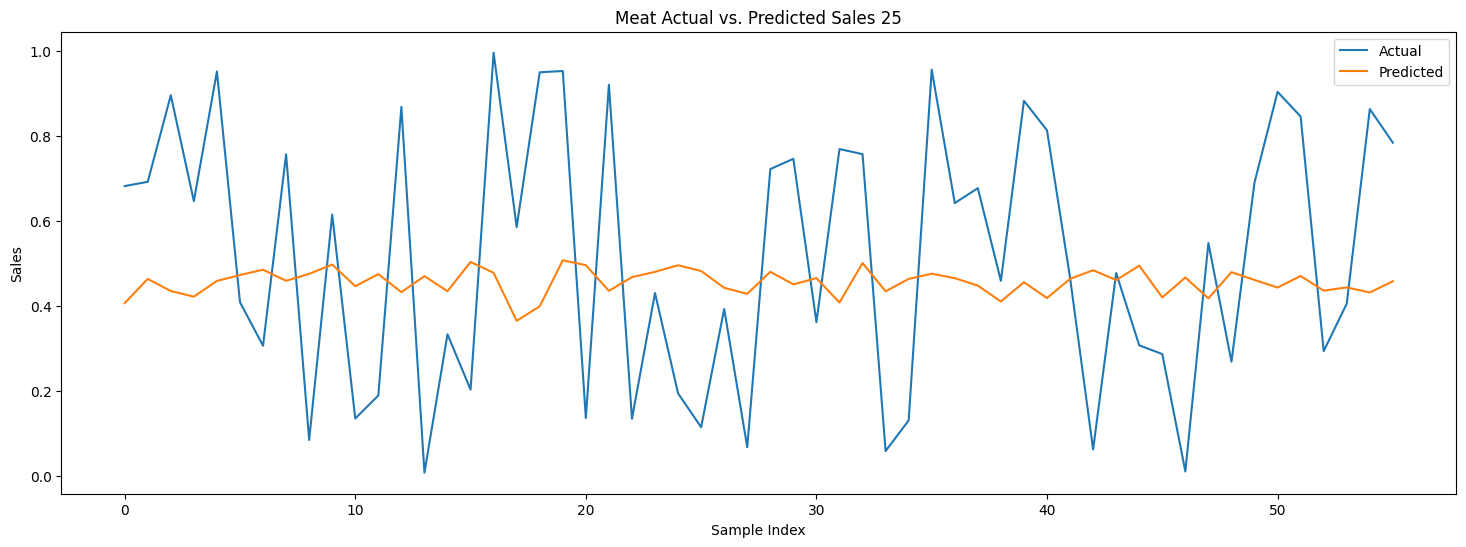

3620 (362, 10, 1, 1)
Epoch 1/50
8/8 [==============================] - 2s 86ms/step - loss: 0.2184 - val_loss: 0.1412
Epoch 2/50
8/8 [==============================] - 0s 11ms/step - loss: 0.1122 - val_loss: 0.0752
Epoch 3/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0965 - val_loss: 0.0762
Epoch 4/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0928 - val_loss: 0.0896
Epoch 5/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0911 - val_loss: 0.0747
Epoch 6/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0889 - val_loss: 0.0726
Epoch 7/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0892 - val_loss: 0.0764
Epoch 8/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0882 - val_loss: 0.0775
Epoch 9/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0880 - val_loss: 0.0752
Epoch 10/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0883 - val_loss: 0.0731
Epoch 11

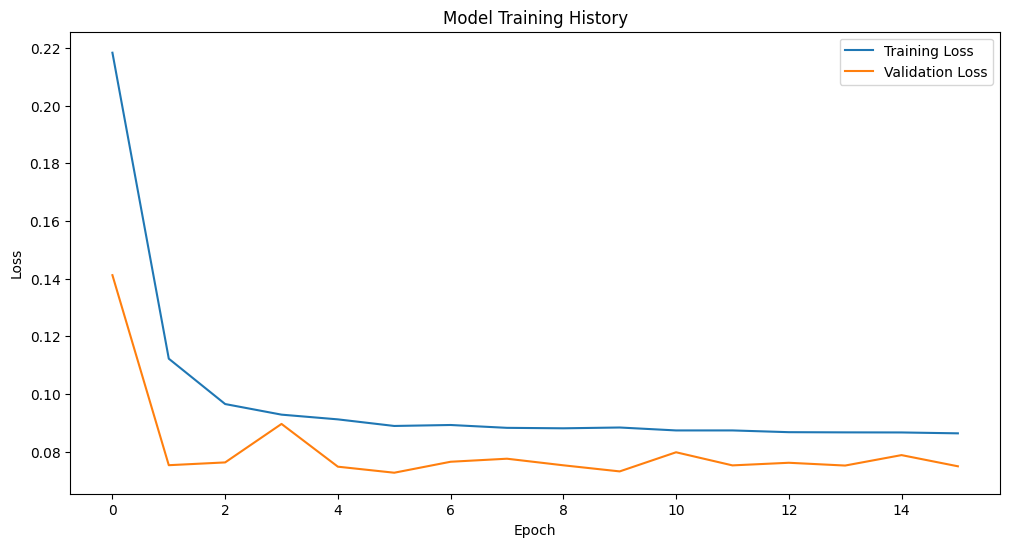

2/2 [==============================] - 0s 6ms/step
55 (362,)


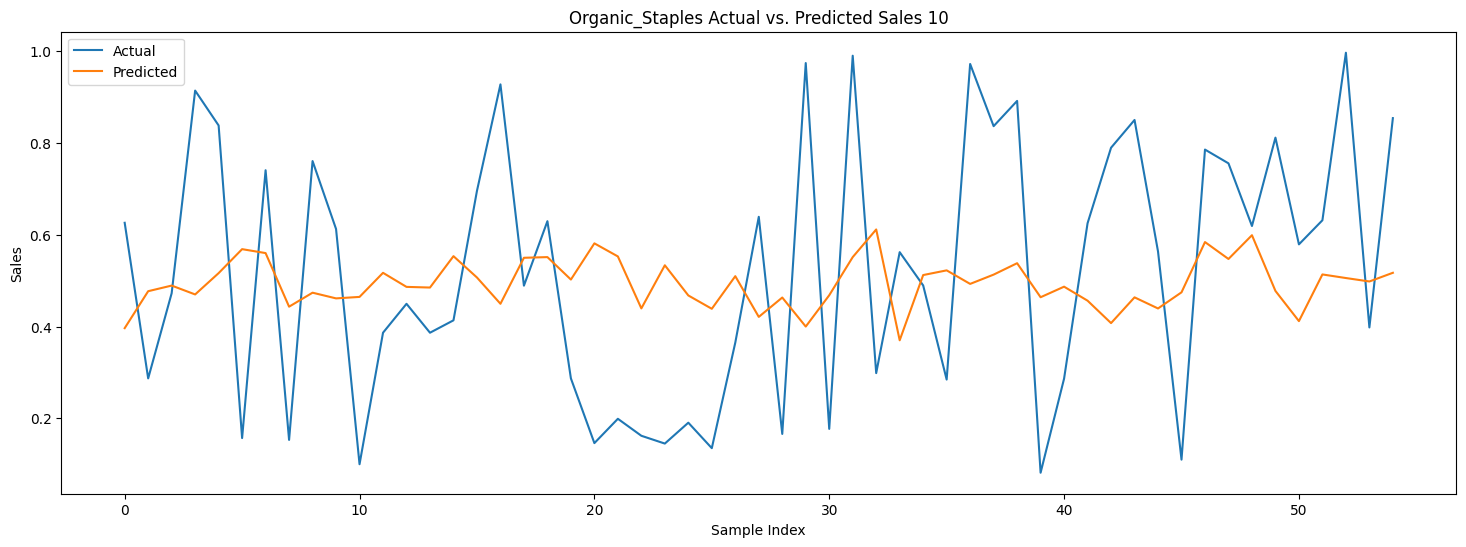

8225 (329, 25, 1, 1)
Epoch 1/50
8/8 [==============================] - 3s 191ms/step - loss: 0.2467 - val_loss: 0.1100
Epoch 2/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0927 - val_loss: 0.1257
Epoch 3/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0738 - val_loss: 0.0866
Epoch 4/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0753 - val_loss: 0.0897
Epoch 5/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0709 - val_loss: 0.0933
Epoch 6/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0711 - val_loss: 0.0911
Epoch 7/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0710 - val_loss: 0.0912
Epoch 8/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0708 - val_loss: 0.0904
Epoch 9/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0708 - val_loss: 0.0919
Epoch 10/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0702 - val_loss: 0.0871
Epoch 1

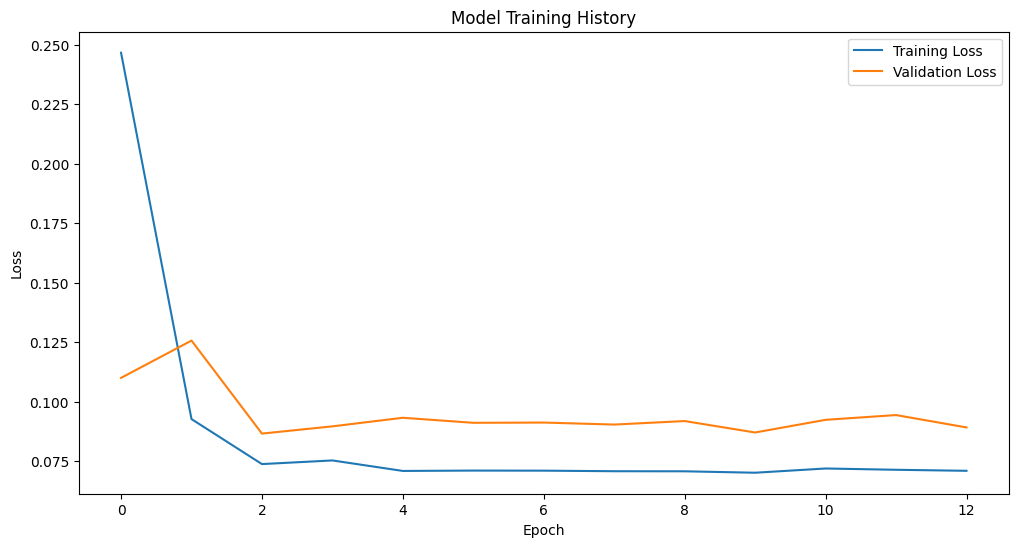

2/2 [==============================] - 0s 5ms/step
50 (329,)


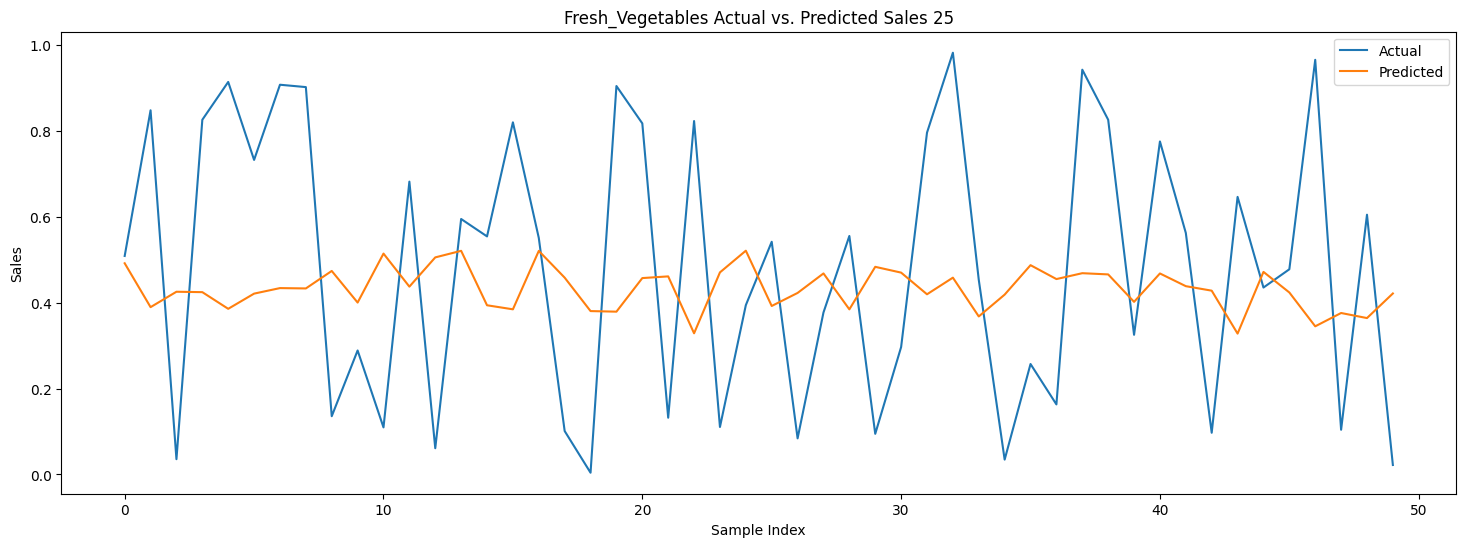

1715 (343, 5, 1, 1)
Epoch 1/50
8/8 [==============================] - 2s 57ms/step - loss: 0.2705 - val_loss: 0.2938
Epoch 2/50
8/8 [==============================] - 0s 10ms/step - loss: 0.1960 - val_loss: 0.2068
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 0.1265 - val_loss: 0.1279
Epoch 4/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0957 - val_loss: 0.1163
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0978 - val_loss: 0.1181
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0932 - val_loss: 0.1230
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0919 - val_loss: 0.1195
Epoch 8/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0908 - val_loss: 0.1154
Epoch 9/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0912 - val_loss: 0.1161
Epoch 10/50
8/8 [==============================] - 0s 7ms/step - loss: 0.0903 - val_loss: 0.1196
Epoch 11/50
8/8

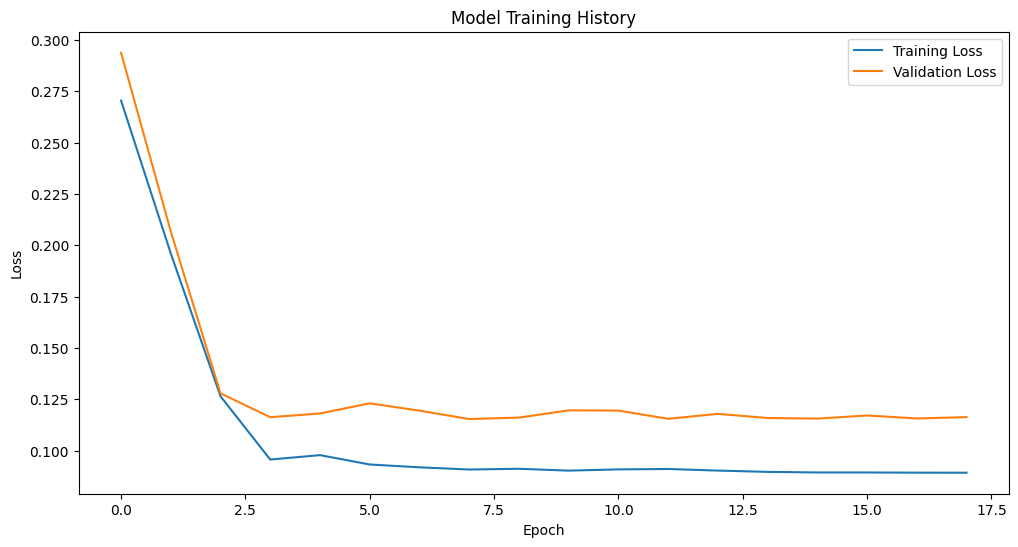

2/2 [==============================] - 0s 6ms/step
52 (343,)


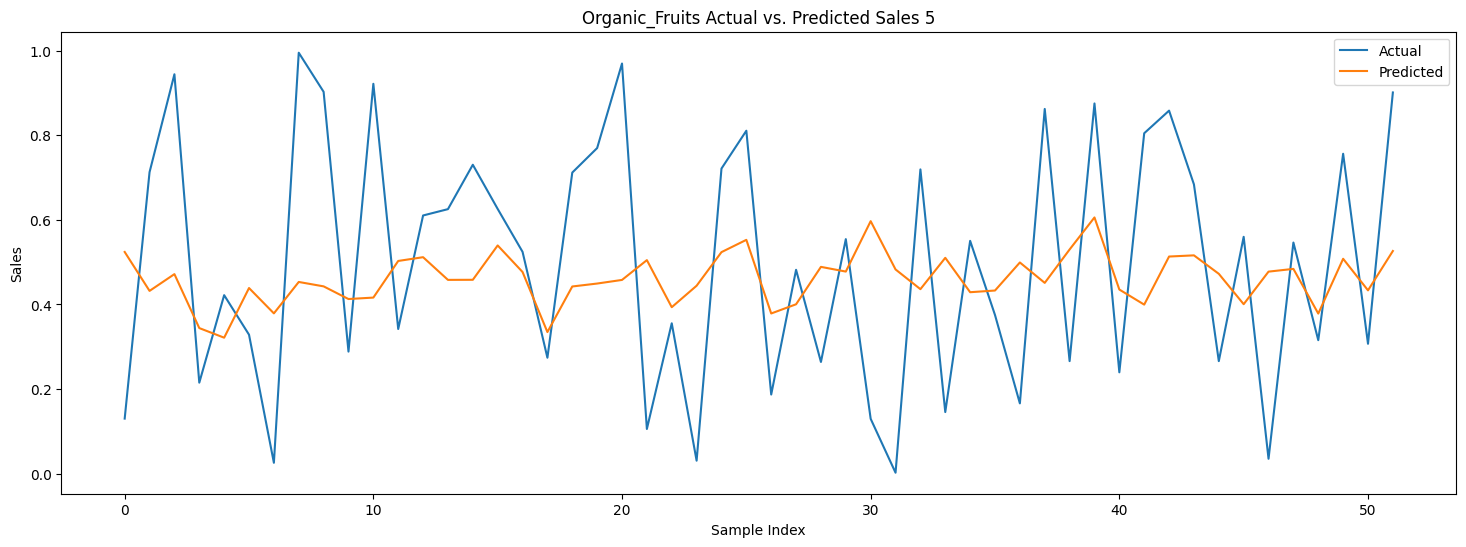

6710 (671, 10, 1, 1)
Epoch 1/50
15/15 [==============================] - 2s 34ms/step - loss: 0.1314 - val_loss: 0.0905
Epoch 2/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0951 - val_loss: 0.0949
Epoch 3/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0888 - val_loss: 0.0906
Epoch 4/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0889 - val_loss: 0.0879
Epoch 5/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0861 - val_loss: 0.0887
Epoch 6/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0858 - val_loss: 0.0888
Epoch 7/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0863 - val_loss: 0.0856
Epoch 8/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0848 - val_loss: 0.0895
Epoch 9/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0846 - val_loss: 0.0875
Epoch 10/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0841 - val_loss: 0.0

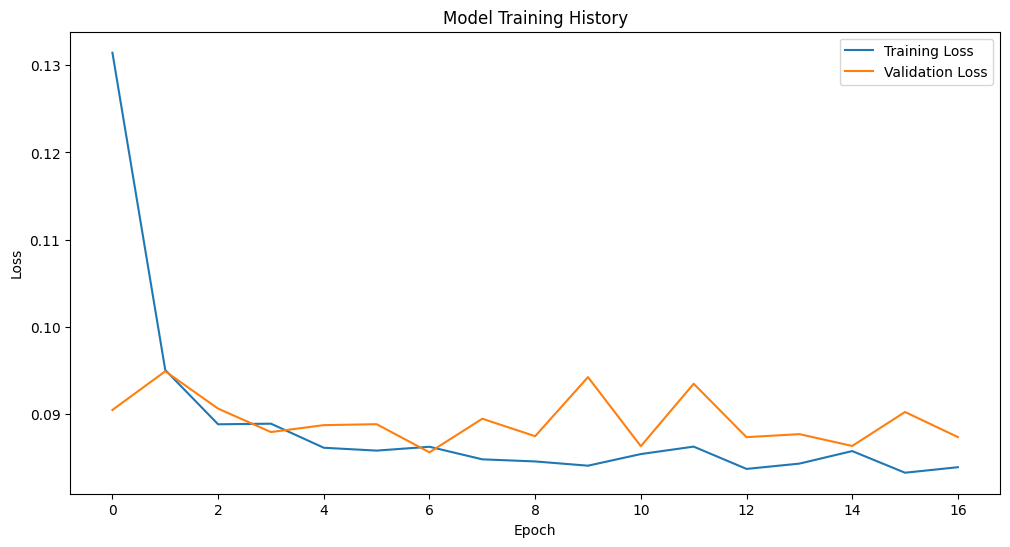

4/4 [==============================] - 0s 5ms/step
101 (671,)


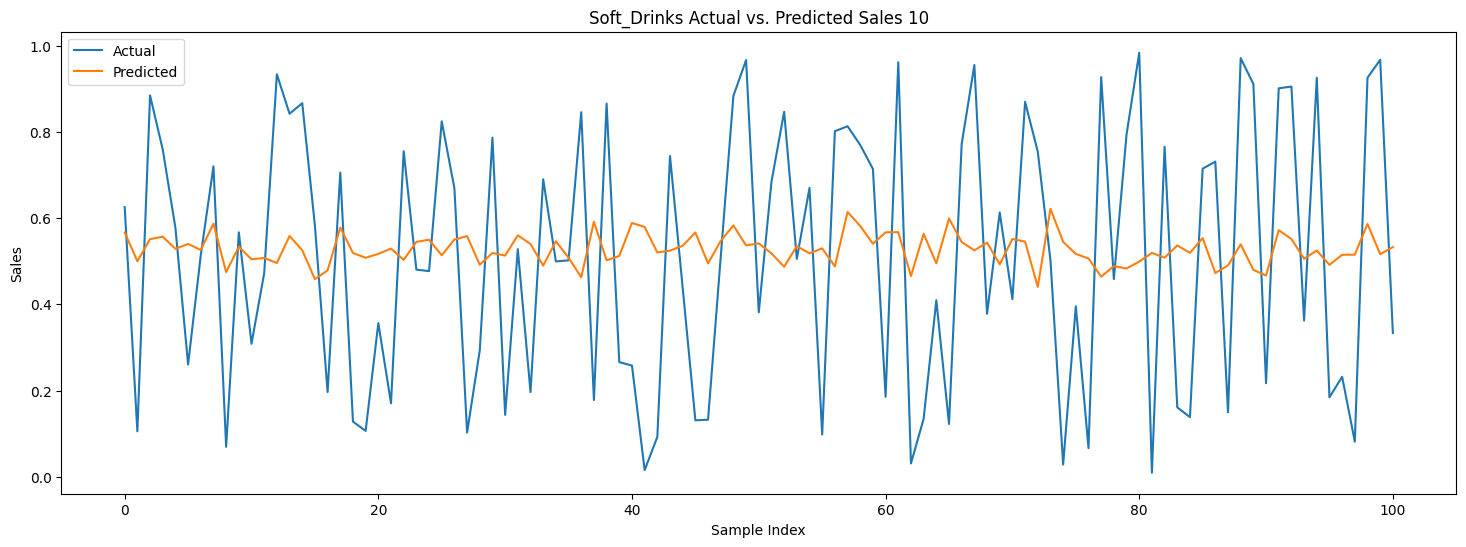

1870 (374, 5, 1, 1)
Epoch 1/50
9/9 [==============================] - 3s 54ms/step - loss: 0.3111 - val_loss: 0.2121
Epoch 2/50
9/9 [==============================] - 0s 8ms/step - loss: 0.2070 - val_loss: 0.1115
Epoch 3/50
9/9 [==============================] - 0s 8ms/step - loss: 0.1086 - val_loss: 0.0634
Epoch 4/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0980 - val_loss: 0.0631
Epoch 5/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0921 - val_loss: 0.0627
Epoch 6/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0902 - val_loss: 0.0621
Epoch 7/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0895 - val_loss: 0.0630
Epoch 8/50
9/9 [==============================] - 0s 9ms/step - loss: 0.0922 - val_loss: 0.0632
Epoch 9/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0897 - val_loss: 0.0625
Epoch 10/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0910 - val_loss: 0.0651
Epoch 11/50
9/9 [

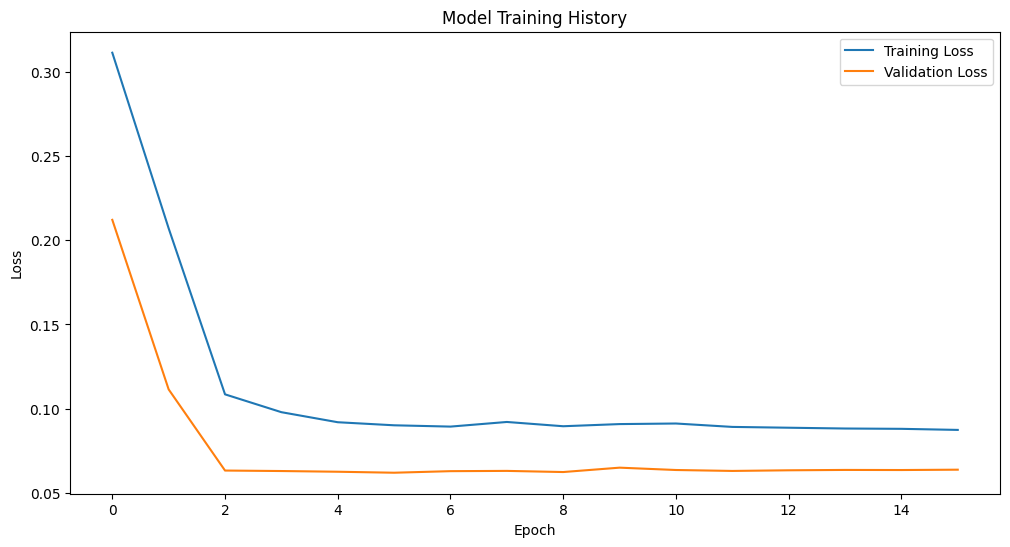

2/2 [==============================] - 0s 6ms/step
57 (374,)


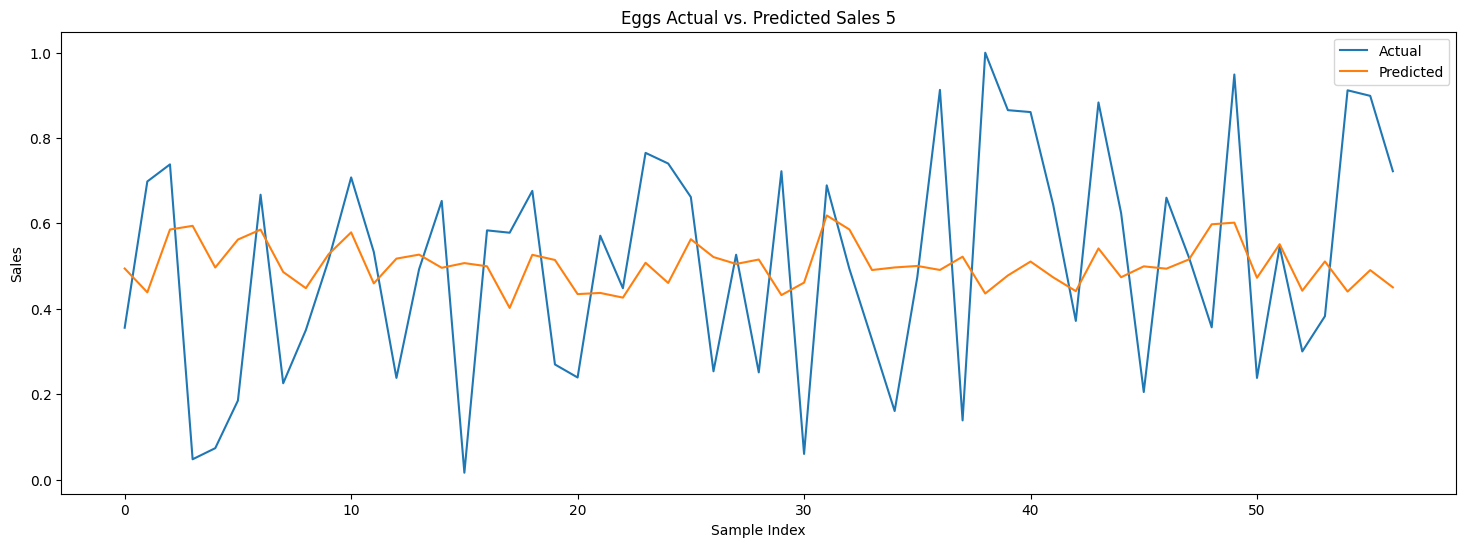

In [328]:
Overall_model = run_model('Overall',df_selected, 128, 20)
Breads_model = run_model('Breads',dfs['Breads'](), 32, 25)
Cakes_model = run_model('Cakes',dfs['Cakes'](),32,15)
Health_Drinks_model = run_model('Health_Drinks',dfs['Health_Drinks'](),32,5)
Chocolates_model = run_model('Chocolates',dfs['Chocolates'](),32,5)
Fish_model = run_model('Fish',dfs['Fish'](),32,15)
Salt_model = run_model('Salt',dfs['Salt'](),32,15)
Noodles_model = run_model('Noodles',dfs['Noodles'](),32,10)
Cookies_model = run_model('Cookies',dfs['Cookies'](),32,5)
Organic_Vegetables_model = run_model('Organic_Vegetables',dfs['Organic_Vegetables'](),32,10)
Flour_model = run_model('Flour',dfs['Flour'](),32,5)
Edible_Oil_model = run_model('Edible_Oil',dfs['Edible_Oil'](),32,10)
Chicken_model = run_model('Chicken',dfs['Chicken'](),32,10)
Biscuits_model = run_model('Biscuits',dfs['Biscuits'](),32,10)
Legumes_model = run_model('Legumes',dfs['Legumes'](),32,10)
Spices_model = run_model('Spices',dfs['Spices'](),32,10)
Fresh_Fruits_model = run_model('Fresh_Fruits',dfs['Fresh_Fruits'](),32,10)
Rice_model = run_model('Rice',dfs['Rice'](),32,10)
Meat_model = run_model('Meat',dfs['Meat'](),32,25)
Organic_Staples_model = run_model('Organic_Staples',dfs['Organic_Staples'](),32,10)
Fresh_Vegetables_model = run_model('Fresh_Vegetables',dfs['Fresh_Vegetables'](),32,25)
Organic_Fruits_model = run_model('Organic_Fruits',dfs['Organic_Fruits'](),32,5)
Soft_Drinks_model = run_model('Soft_Drinks',dfs['Soft_Drinks'](),32,10)
Eggs_model = run_model('Eggs',dfs['Eggs'](),32,5)

In [307]:
import requests
import pandas as pd
url = "https://damang2003.et.r.appspot.com/transaksi"

params = {"user_id": 1}
response = requests.get(url, params=params)
# Menggunakan metode GET untuk mengambil data
response = requests.get(url)

# Memeriksa apakah permintaan berhasil (kode status 200)
if response.status_code == 200:
    # Mendapatkan data dalam format JSON
    data = response.json()
    data = pd.DataFrame(data)
    print(data)
else:
    # Menampilkan pesan kesalahan jika permintaan tidak berhasil
    print(f"Failed to retrieve data. Status code: {response.status_code}")
    print(response.text)

     transaksi_id  user_id     nama_barang  jumlah total_harga   createdAt  \
0               2        1  Organic_Fruits       5   100000.00  2018-09-27   
1               8        1         Legumes       7   140000.00  2018-11-16   
2               9        1         Legumes       5   100000.00  2018-09-23   
3              11        1            Meat       4   300000.00  2018-10-26   
4              15        1          Spices       5    25000.00  2018-11-20   
..            ...      ...             ...     ...         ...         ...   
896          2987        1            Meat       1    75000.00  2018-12-27   
897          2991        1         Legumes      10   200000.00  2018-12-14   
898          2993        1      Chocolates       4    20000.00  2018-10-13   
899          2998        1         Legumes       9   180000.00  2018-11-14   
900          2999        2  Celana Panjang       4   240000.00  2023-12-20   

      updatedAt  item_id  
0    2018-12-17       21  
1    2018

In [308]:
# Sort the DataFrame by 'Order Date'
data.sort_values('createdAt', inplace=True)
data.head

<bound method NDFrame.head of      transaksi_id  user_id         nama_barang  jumlah total_harga  \
550          1866        1  Organic_Vegetables       9    90000.00   
378          1267        1                Fish       5   100000.00   
428          1474        1             Cookies       2     4000.00   
667          2247        1              Spices       5    25000.00   
883          2956        1               Cakes       4     8000.00   
..            ...      ...                 ...     ...         ...   
570          1921        1            Biscuits       7    14000.00   
560          1887        1  Organic_Vegetables       7    70000.00   
76            269        1              Spices       3    15000.00   
181           595        1  Organic_Vegetables       4    40000.00   
900          2999        2      Celana Panjang       4   240000.00   

      createdAt   updatedAt  item_id  
550  2018-08-09  2018-12-23        9  
378  2018-08-09  2018-08-22        5  
428  2018-08

In [309]:
# Selecting specific columns
new_selected_columns = ['createdAt', 'nama_barang', 'total_harga']
#selected_columns = ['Order Date', 'Item', 'Sales']
new_df_selected = data[new_selected_columns]

In [310]:
# Rename columns
column_mapping = {'createdAt': 'Order Date', 'nama_barang': 'Item', 'total_harga': 'Sales'}
new_df_selected.rename(columns=column_mapping, inplace=True)

<ipython-input-310-d43df831a620>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_selected.rename(columns=column_mapping, inplace=True)


In [311]:

new_df_selected = new_df_selected.dropna(subset=['Sales'])
numerical_columns = ['Sales']
new_scaler = MinMaxScaler()
new_df_selected[numerical_columns] = new_scaler.fit_transform(new_df_selected[numerical_columns])

In [312]:
#distinc the items
items = new_df_selected['Item'].drop_duplicates(keep = 'first')
print(items)

550    Organic_Vegetables
378                  Fish
428               Cookies
667                Spices
883                 Cakes
41                   Rice
196                Breads
301            Edible_Oil
298               Noodles
242                  Meat
18           Fresh_Fruits
443        Organic_Fruits
628               Legumes
136                  Salt
850      Fresh_Vegetables
359                 Flour
466         Health_Drinks
670              Biscuits
576            Chocolates
553               Chicken
864       Organic_Staples
900        Celana Panjang
Name: Item, dtype: object


In [313]:
# Create a dictionary to store DataFrames for each item
new_dfs = {}
#make a new df for every items
for item in items:
    item_df = pd.DataFrame(new_df_selected.loc[new_df_selected['Item'] == item]).copy
    new_dfs[item] = item_df
#print every item's df
for item, item_df in new_dfs.items():
    print(f"DataFrame for {item}:")
    print(item_df)
    print("\n")

DataFrame for Organic_Vegetables:
<bound method NDFrame.copy of      Order Date                Item     Sales
550  2018-08-09  Organic_Vegetables  0.117647
662  2018-08-11  Organic_Vegetables  0.104278
163  2018-08-13  Organic_Vegetables  0.117647
757  2018-08-14  Organic_Vegetables  0.104278
554  2018-08-29  Organic_Vegetables  0.117647
758  2018-09-03  Organic_Vegetables  0.117647
387  2018-09-08  Organic_Vegetables  0.090909
198  2018-09-12  Organic_Vegetables  0.090909
26   2018-09-13  Organic_Vegetables  0.024064
449  2018-09-17  Organic_Vegetables  0.077540
6    2018-09-17  Organic_Vegetables  0.104278
384  2018-09-18  Organic_Vegetables  0.064171
85   2018-09-23  Organic_Vegetables  0.037433
50   2018-10-05  Organic_Vegetables  0.117647
212  2018-10-05  Organic_Vegetables  0.090909
517  2018-10-12  Organic_Vegetables  0.064171
494  2018-10-28  Organic_Vegetables  0.010695
293  2018-10-29  Organic_Vegetables  0.024064
549  2018-11-06  Organic_Vegetables  0.050802
619  2018-11-07 

In [344]:
def predict_future(model, data, sequence_length):
    # Normalization of data
    sequences, y = create_sequences(data, sequence_length)

    # Take the last 'sequence_length' days as the initial condition
    initial_data = sequences[-sequence_length:]

    # Ensure that the shape matches the model's input requirements
    initial_data = np.expand_dims(initial_data, axis=-1)  # Add an extra dimension if needed

    # Perform prediction for the next day
    next_day_prediction = model.predict(initial_data)

    # Inverse normalization of the prediction
    prediction = next_day_prediction.reshape(-1, 1)

    return prediction


In [345]:
Overall_sales_pred = predict_future(Overall_model,new_df_selected, 20)
Breads_sales_pred = predict_future(Breads_model,new_dfs['Breads'](), 25)
Cakes_sales_pred = predict_future(Cakes_model,new_dfs['Cakes'](),15)
Health_Drinks_sales_pred = predict_future(Health_Drinks_model,new_dfs['Health_Drinks'](),5)
Chocolates_sales_pred = predict_future(Chocolates_model,new_dfs['Chocolates'](),5)
Fish_sales_pred = predict_future(Fish_model,new_dfs['Fish'](),15)
Salt_sales_pred = predict_future(Salt_model,new_dfs['Salt'](),15)
Noodles_sales_pred = predict_future(Noodles_model,new_dfs['Noodles'](),10)
Cookies_sales_pred = predict_future(Cookies_model,new_dfs['Cookies'](),5)
Organic_Vegetables_sales_pred = predict_future(Organic_Vegetables_model,new_dfs['Organic_Vegetables'](),10)
Flour_sales_pred = predict_future(Flour_model,new_dfs['Flour'](),5)
Edible_Oil_sales_pred = predict_future(Edible_Oil_model,new_dfs['Edible_Oil'](),10)
Chicken_sales_pred = predict_future(Chicken_model,new_dfs['Chicken'](),10)
Biscuits_sales_pred = predict_future(Biscuits_model,new_dfs['Biscuits'](),10)
Legumes_sales_pred = predict_future(Legumes_model,new_dfs['Legumes'](),10)
Spices_sales_pred = predict_future(Spices_model,new_dfs['Spices'](),10)
Fresh_Fruits_sales_pred = predict_future(Fresh_Fruits_model,new_dfs['Fresh_Fruits'](),10)
Rice_sales_pred = predict_future(Rice_model,new_dfs['Rice'](),10)
Meat_sales_pred = predict_future(Meat_model,new_dfs['Meat'](),25)
Organic_Staples_sales_pred = predict_future(Organic_Staples_model,new_dfs['Organic_Staples'](),10)
Fresh_Vegetables_sales_pred = predict_future(Fresh_Vegetables_model,new_dfs['Fresh_Vegetables'](),25)
Organic_Fruits_sales_pred = predict_future(Organic_Fruits_model,new_dfs['Organic_Fruits'](),5)
#Soft_Drinks_sales_pred = predict_future(Soft_Drinks_model,new_dfs['Soft_Drinks'](),10)
#Eggs_sales_pred = predict_future(Eggs_model,new_dfs['Eggs'](),5)



1/1 [==============================] - 0s 16ms/step


In [346]:
Overall_result=new_scaler.inverse_transform(Overall_sales_pred.reshape(-1,1))
Breads_result=new_scaler.inverse_transform(breads_sales_pred.reshape(-1,1))
Cakes_result=new_scaler.inverse_transform(Cakes_sales_pred.reshape(-1,1))
Health_Drinks_result=new_scaler.inverse_transform(Health_Drinks_sales_pred.reshape(-1,1))
Chocolates_result=new_scaler.inverse_transform(Chocolates_sales_pred.reshape(-1,1))
Fish_result=new_scaler.inverse_transform(Fish_sales_pred.reshape(-1,1))
Salt_result=new_scaler.inverse_transform(Salt_sales_pred.reshape(-1,1))
Noodles_result=new_scaler.inverse_transform(Noodles_sales_pred.reshape(-1,1))
Cookies_result=new_scaler.inverse_transform(Cookies_sales_pred.reshape(-1,1))
Organic_Vegetables_result=new_scaler.inverse_transform(Organic_Vegetables_sales_pred.reshape(-1,1))
Flour_result=new_scaler.inverse_transform(Flour_sales_pred.reshape(-1,1))
Edible_Oil_result=new_scaler.inverse_transform(Edible_Oil_sales_pred.reshape(-1,1))
Chicken_result=new_scaler.inverse_transform(Chicken_sales_pred.reshape(-1,1))
Biscuits_result=new_scaler.inverse_transform(Biscuits_sales_pred.reshape(-1,1))
Legumes_result=new_scaler.inverse_transform(Legumes_sales_pred.reshape(-1,1))
Spices_result=new_scaler.inverse_transform(Spices_sales_pred.reshape(-1,1))
Fresh_Fruits_result=new_scaler.inverse_transform(Fresh_Fruits_sales_pred.reshape(-1,1))
Rice_result=new_scaler.inverse_transform(Rice_sales_pred.reshape(-1,1))
Meat_result=new_scaler.inverse_transform(Meat_sales_pred.reshape(-1,1))
Organic_Staples_result=new_scaler.inverse_transform(Organic_Staples_sales_pred.reshape(-1,1))
Fresh_Vegetables_result=new_scaler.inverse_transform(Fresh_Vegetables_sales_pred.reshape(-1,1))
Organic_Fruits_result=new_scaler.inverse_transform(Organic_Fruits_sales_pred.reshape(-1,1))
#Soft_Drinks_result=new_scaler.inverse_transform(Soft_Drinks_sales_pred.reshape(-1,1))
#Eggs_result=new_scaler.inverse_transform(Eggs_sales_pred.reshape(-1,1))


In [349]:
def trend(name,result, df):
  df_sales = df[['Sales']]  # Extracting the 'Sales' column
  df_sales_inverse = new_scaler.inverse_transform(df_sales)
  if result[-1]>df_sales_inverse[-1]:
    print(f"{name} Trendline is Uptrend")
  else:
    print(f"{name} Trendline is Downtrend")

In [350]:
trend('Overall', Overall_result,new_df_selected)
trend('Breads',Breads_result, new_dfs['Breads']())
trend('Cakes',Cakes_result, new_dfs['Cakes']())
trend('Health_Drinks',Health_Drinks_result, new_dfs['Health_Drinks']())
trend('Chocolates',Chocolates_result, new_dfs['Chocolates']())
trend('Fish',Fish_result, new_dfs['Fish']())
trend('Salt',Salt_result, new_dfs['Salt']())
trend('Noodles',Noodles_result, new_dfs['Noodles']())
trend('Cookies',Cookies_result, new_dfs['Cookies']())
trend('Organic_Vegetables',Organic_Vegetables_result, new_dfs['Organic_Vegetables']())
trend('Flour',Flour_result, new_dfs['Flour']())
trend('Edible_Oil',Edible_Oil_result, new_dfs['Edible_Oil']())
trend('Chicken',Chicken_result, new_dfs['Chicken']())
trend('Biscuits',Biscuits_result, new_dfs['Biscuits']())
trend('Legumes',Legumes_result, new_dfs['Legumes']())
trend('Spices',Spices_result, new_dfs['Spices']())
trend('Fresh_Fruits',Fresh_Fruits_result, new_dfs['Fresh_Fruits']())
trend('Rice',Rice_result, new_dfs['Rice']())
trend('Meat',Meat_result, new_dfs['Meat']())
trend('Organic_Staples',Organic_Staples_result, new_dfs['Organic_Staples']())
trend('Fresh_Vegetables',Fresh_Vegetables_result, new_dfs['Fresh_Vegetables']())
trend('Organic_Fruits',Organic_Fruits_result, new_dfs['Organic_Fruits']())
#trend('Soft_Drinks',Soft_Drinks_result, new_dfs['Soft_Drinks']())
#trend('Eggs',Eggs_result, new_dfs['Eggs']())

Overall Trendline is Uptrend
Breads Trendline is Uptrend
Cakes Trendline is Uptrend
Health_Drinks Trendline is Uptrend
Chocolates Trendline is Uptrend
Fish Trendline is Uptrend
Salt Trendline is Uptrend
Noodles Trendline is Uptrend
Cookies Trendline is Uptrend
Organic_Vegetables Trendline is Uptrend
Flour Trendline is Uptrend
Edible_Oil Trendline is Uptrend
Chicken Trendline is Uptrend
Biscuits Trendline is Uptrend
Legumes Trendline is Uptrend
Spices Trendline is Uptrend
Fresh_Fruits Trendline is Uptrend
Rice Trendline is Uptrend
Meat Trendline is Downtrend
Organic_Staples Trendline is Uptrend
Fresh_Vegetables Trendline is Uptrend
Organic_Fruits Trendline is Uptrend
